<a href="https://colab.research.google.com/github/saradeuJP/STDef/blob/main/ICPC_thesis_91_def_ML_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib as mpl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

In [ ]:
!wget -O /usr/local/share/fonts/Times.ttf https://drive.google.com/file/d/1jC7f8KGOnWWLuHzI5scbciI4QgWDTDRW/view?usp=sharing
# fm.fontManager.ttflist += fm.createFontList(['/usr/local/share/fonts/Times.ttf'])
mpl.rc('font', family='serif',size = 18)

--2023-10-04 15:09:06--  https://drive.google.com/file/d/1jC7f8KGOnWWLuHzI5scbciI4QgWDTDRW/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.250.101.101, 142.250.101.138, 142.250.101.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/local/share/fonts/Times.ttf’

/usr/local/share/fo     [ <=>                ]  81.40K  --.-KB/s    in 0.007s  

2023-10-04 15:09:07 (10.8 MB/s) - ‘/usr/local/share/fonts/Times.ttf’ saved [83353]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data0 = pd.read_csv('/content/drive/MyDrive/ML_transient/PD0.csv')
X0 = data0.iloc[:,1:]

data1 = pd.read_csv('/content/drive/MyDrive/ML_transient/PD1.csv')
X1 = data1.iloc[:,1:]

X = pd.concat([X0,X1],axis=0)
X=X[X['Location']=='ICPC']
X=X.drop('Location',axis=1)

data = pd.concat([data0,data1],axis=0)

y0 = data0['Recurrence']
y1 = data1['Recurrence']
Y = pd.concat([y0,y1],axis=0)

In [ ]:
def read_pre(filename):

    aneurysmfile = f'/content/drive/MyDrive/ML_transient/{filename}_pre.csv'
    data = pd.read_csv(aneurysmfile)

    return data['FRratio'],data[' VolaveVelratio'],data[' VolmaxVelratio']

def read_post(filename):

    aneurysmfile = f'/content/drive/MyDrive/ML_transient/{filename}_post.csv'
    data = pd.read_csv(aneurysmfile)

    return data['PmaxRatio'],data[' PaveRatio'], \
            data[' PPmaxRatio'],data[' PPaveRatio'], \
            data[' PdynmaxRatio'],data[' PdynaveRatio'], \
            data[' WSSmaxRatio'],data[' WSSaveRatio']


def read_PDave(filename):

    aneurysmfile = f'/content/drive/MyDrive/ML_transient/{filename}_avePD.csv'
    data = pd.read_csv(aneurysmfile, skiprows=4)
    # data = data.replace(to_replace ="PDa",
    #              value ="avePD")
    # print(data)
    return data.iloc[:,1]

def read_PDmax(filename):

    aneurysmfile = f'/content/drive/MyDrive/ML_transient/{filename}_maxPD.csv'
    data = pd.read_csv(aneurysmfile, skiprows=4)
    # data = data.replace(to_replace ="PDa",
    #              value ="avePD")
    # print(data)
    return data.iloc[:,1]

In [ ]:
names = data['Name']
idxs = np.arange(0, names.shape[0])
newX=pd.DataFrame()



time_ar = ['a','std','min','q1','median','q2','max'] #'skew',
area_ar = ['ave','max']
var_ar = ['FR','volvel','PD','P','PP','Pdyn','WSS']

vars = []

for var in var_ar:
  for area in area_ar:
    for time in time_ar:
      vars.append(var+area+'_'+time)

pd_ar = pd.DataFrame(columns=vars)

for fn in range(names.shape[0]):
  temp = pd.DataFrame()
  temp2 = pd.DataFrame()
  temp3 = pd.DataFrame()
  #pd_ar.insert(loc=-1,column=name,value=)
  FR,volvelave,volvelmax = read_pre(names.iloc[idxs[fn]])
  PDave = read_PDave(names.iloc[idxs[fn]])
  PDmax = read_PDmax(names.iloc[idxs[fn]])
  Pmax,Pave,PPmax,PPave,Pdynave,Pdynmax,WSSmax,WSSave = read_post(names.iloc[idxs[fn]])
  temp = pd.DataFrame({'FR':np.array(FR).flatten(),

             'volvelave':np.array(volvelave).flatten(),'volvelmax':np.array(volvelmax).flatten(),

             'Pave':np.array(Pave).flatten(),'Pmax':np.array(Pmax).flatten(),

             'PPmax':np.array(PPmax).flatten(),'PPave':np.array(PPave).flatten(),

             'Pdynmax':np.array(Pdynmax).flatten(),'Pdynave':np.array(Pdynave).flatten(),

             'WSSmax':np.array(WSSmax).flatten(),'WSSave':np.array(WSSave).flatten(),

             'PDave':np.array(PDave).flatten(),'PDmax':np.array(PDmax).flatten()})

  for var in temp:
    count,a,std,min,q1,median,q2,max=temp[var].describe() #



    temp2 = pd.DataFrame({var+'_'+'a':a,
                var+'_'+'std':std,
                var+'_'+'min':min,
                var+'_'+'q1':q1,
                var+'_'+'median':median,
                var+'_'+'q2':q2,
                var+'_'+'max':max},index=[fn])
    # print(temp2.shape)
    temp3=pd.concat([temp3,temp2],axis=1)
  pd_ar=pd.concat([pd_ar,temp3],axis=0)



In [ ]:
# from scipy.stats import levene, ttest_ind
# from scipy.stats import sem
# def sig_ar(X_hemo,data0,data1):
#   sig_ar = []
#   p_ar = []
#   mean0_ar = []
#   mean1_ar = []
#   std0_ar = []
#   std1_ar = []
#   for colName in X_hemo.columns:
#     # print(colName)
#     L = levene(X_hemo[colName].iloc[:data0.shape[0]],X_hemo[colName].iloc[data0.shape[0]:])[1]
#     if L > 0.05:

#       p=ttest_ind(X_hemo[colName].iloc[:data0.shape[0]],X_hemo[colName].iloc[data0.shape[0]:])[1]

#       p_ar.append(p)
#       mean1_ar.append(np.array(X_hemo[colName].iloc[data0.shape[0]:]).mean())
#       mean0_ar.append(np.array(X_hemo[colName].iloc[:data0.shape[0]]).mean())

#       std1_ar.append(np.array(X_hemo[colName].iloc[data0.shape[0]:]).std())
#       std0_ar.append(np.array(X_hemo[colName].iloc[:data0.shape[0]]).std())

#     else:
#       p=ttest_ind(X_hemo[colName].iloc[:data0.shape[0]],X_hemo[colName].iloc[data0.shape[0]:],equal_var=False)[1]

#       p_ar.append(p)
#       mean1_ar.append(np.array(X_hemo[colName].iloc[data0.shape[0]:]).mean())
#       mean0_ar.append(np.array(X_hemo[colName].iloc[:data0.shape[0]]).mean())

#       std1_ar.append(np.array(X_hemo[colName].iloc[data0.shape[0]:]).std())
#       std0_ar.append(np.array(X_hemo[colName].iloc[:data0.shape[0]]).std())

#     # print('--------------')
#     if p < 0.05:
#       sig_ar.append(colName)
#   return p_ar,mean0_ar,mean1_ar,sig_ar,std0_ar,std1_ar

# # test=pd_ar.dropna(axis=1)
# # test.index = X.index
# # X_all = pd.concat([X.iloc[:,4:18],test],axis=1)
# # print(X_all.shape)

# train_X=pd.DataFrame(train_X,columns=X_all.columns)

# p_ar,mean0_ar,mean1_ar,sig_ar_ttest,std0_ar,std1_ar = sig_ar(X_smo_ns.iloc[:,3:],X_smo_ns.iloc[:40,3:],X_smo_ns.iloc[40:,3:])
# print(sig_ar_ttest)
# print(len(sig_ar_ttest))

# meanstd0=[]
# meanstd1=[]
# for i in range(len(mean0_ar)):
#   meanstd0.append(str(np.round(np.array(mean0_ar)[i],5))+"\u00B1"+str(np.round(np.array(std0_ar)[i],5)))
#   meanstd1.append(str(np.round(np.array(mean1_ar)[i],5))+"\u00B1"+str(np.round(np.array(std1_ar)[i],5)))
# ttest = pd.DataFrame({'features':X_all.columns,
#             '0':meanstd0,
#             '1':meanstd1,
#             'p_ar':p_ar})

# ttest.to_excel('ttest_all_dec5.xls')

# # ttest.index = X_all.columns
# # ttest_sig = ttest[sig_ar]
# # ttest_sig.to_excel('ttest_sig.xls')

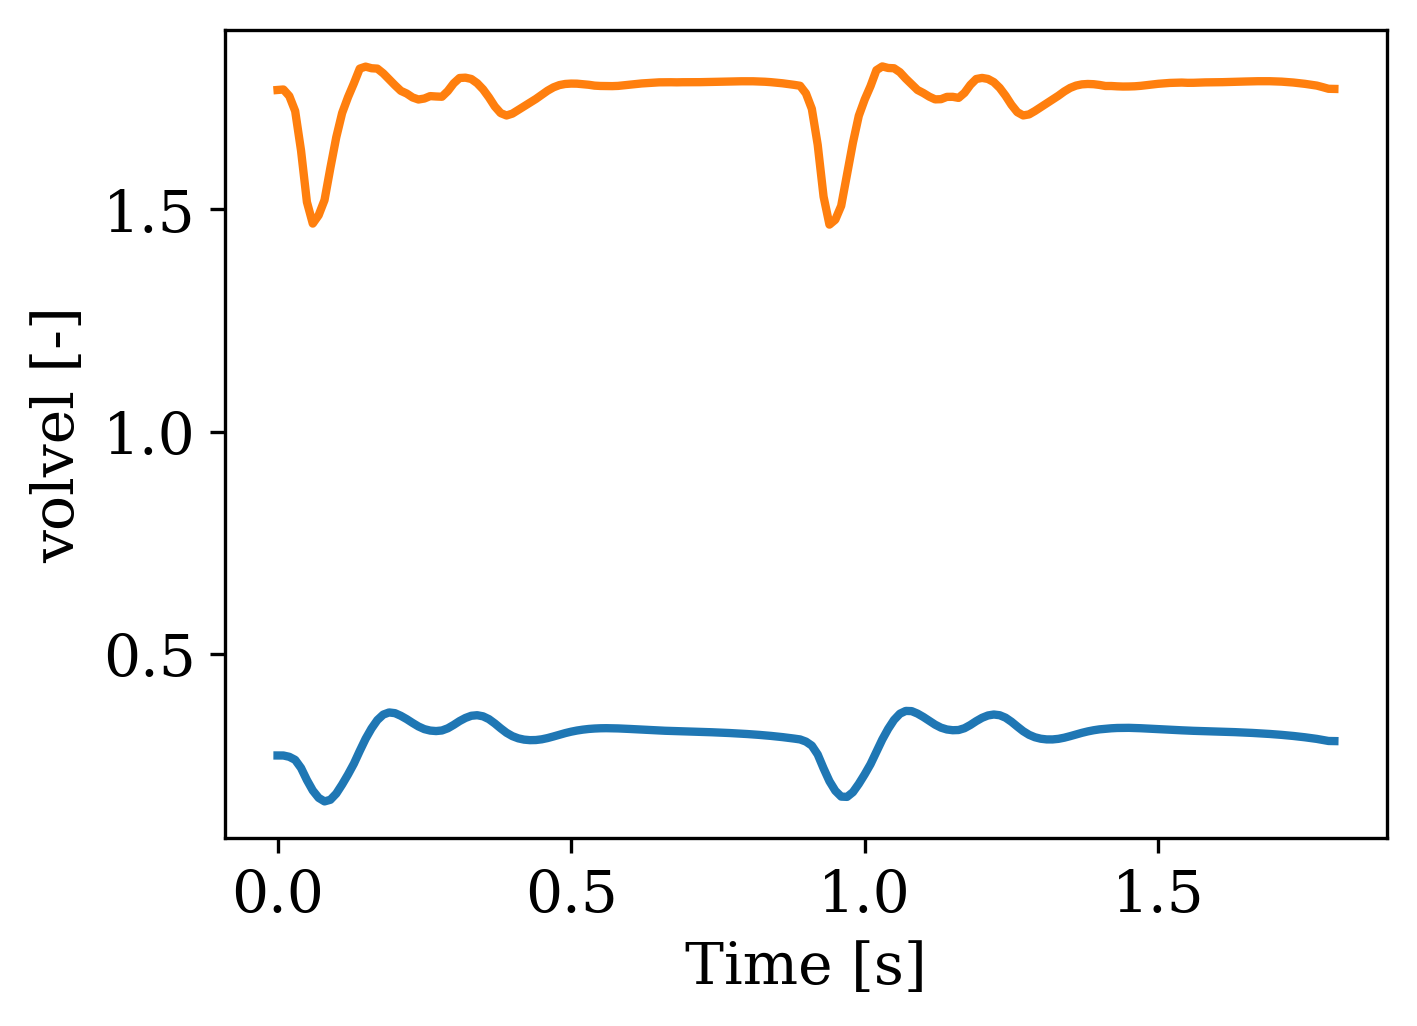

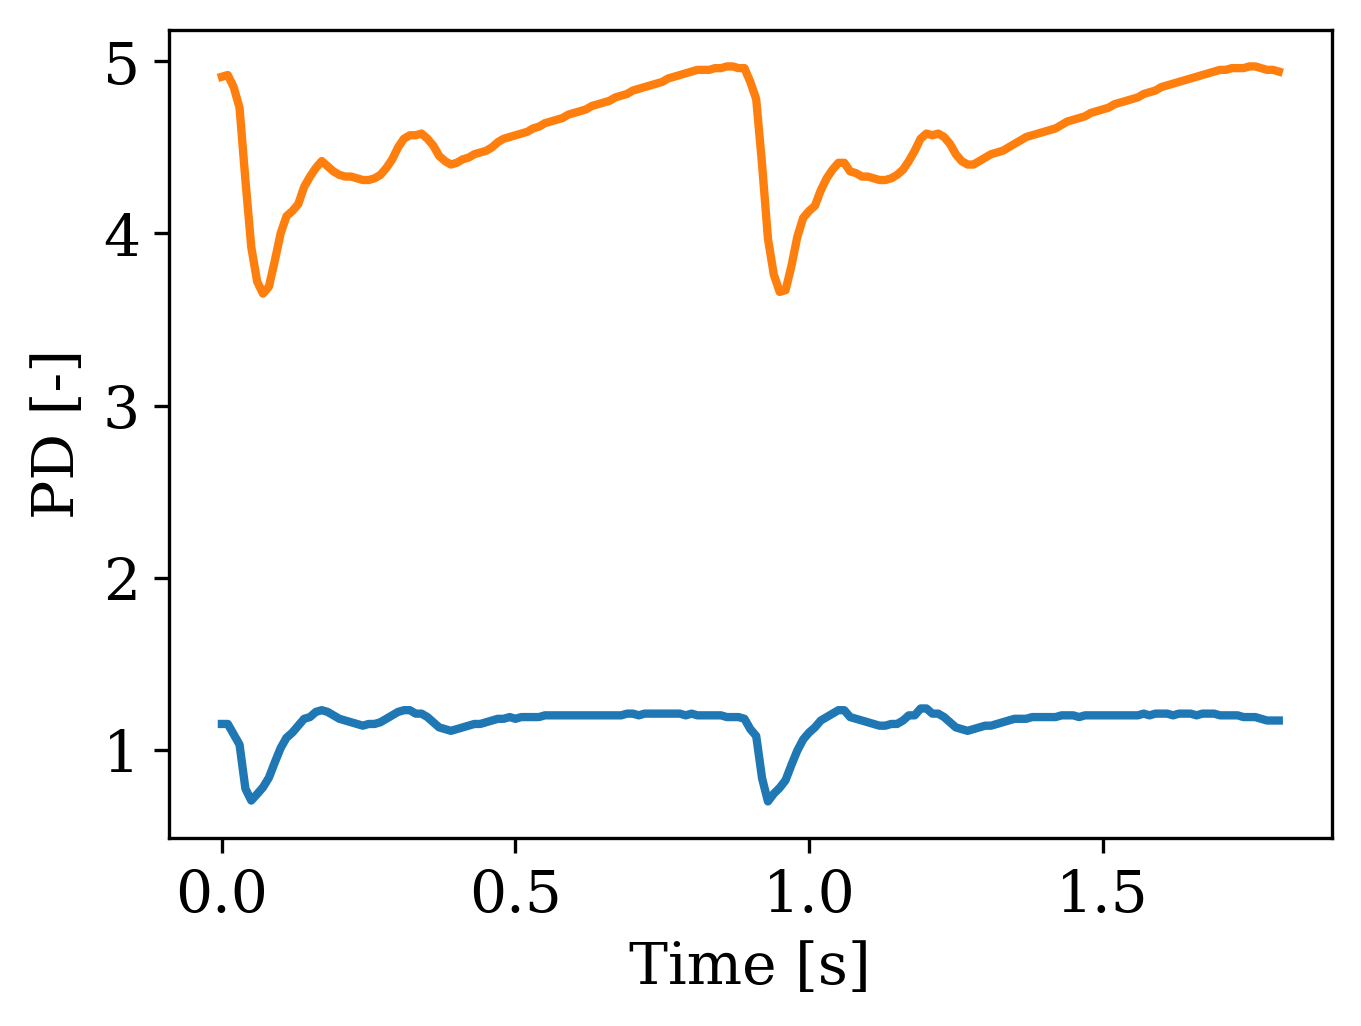

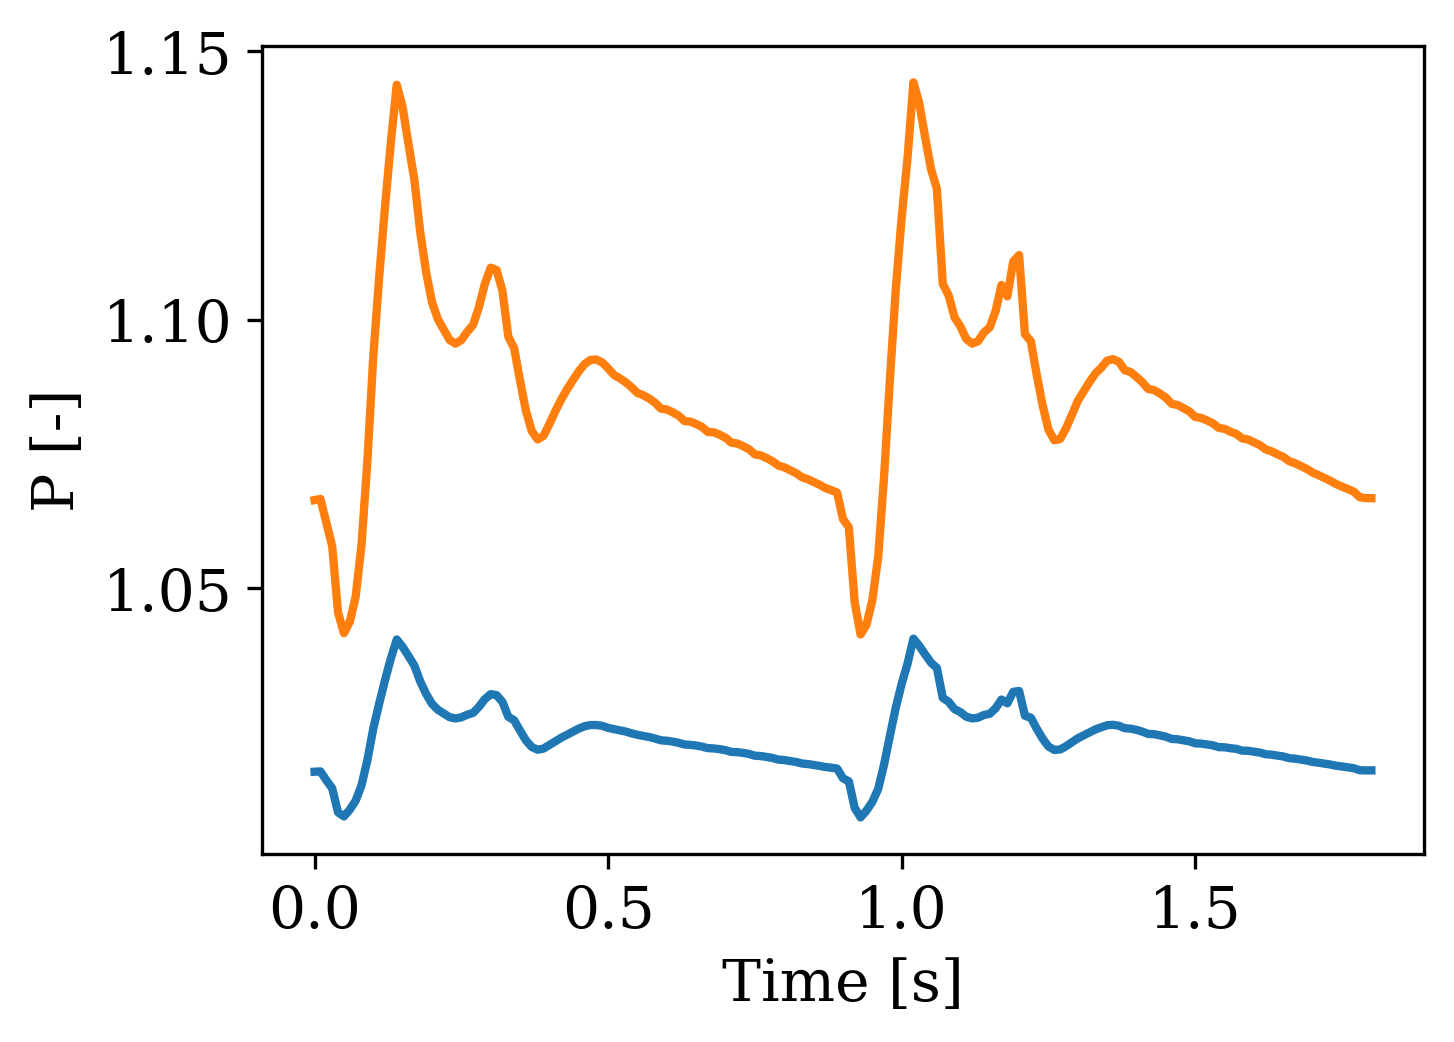

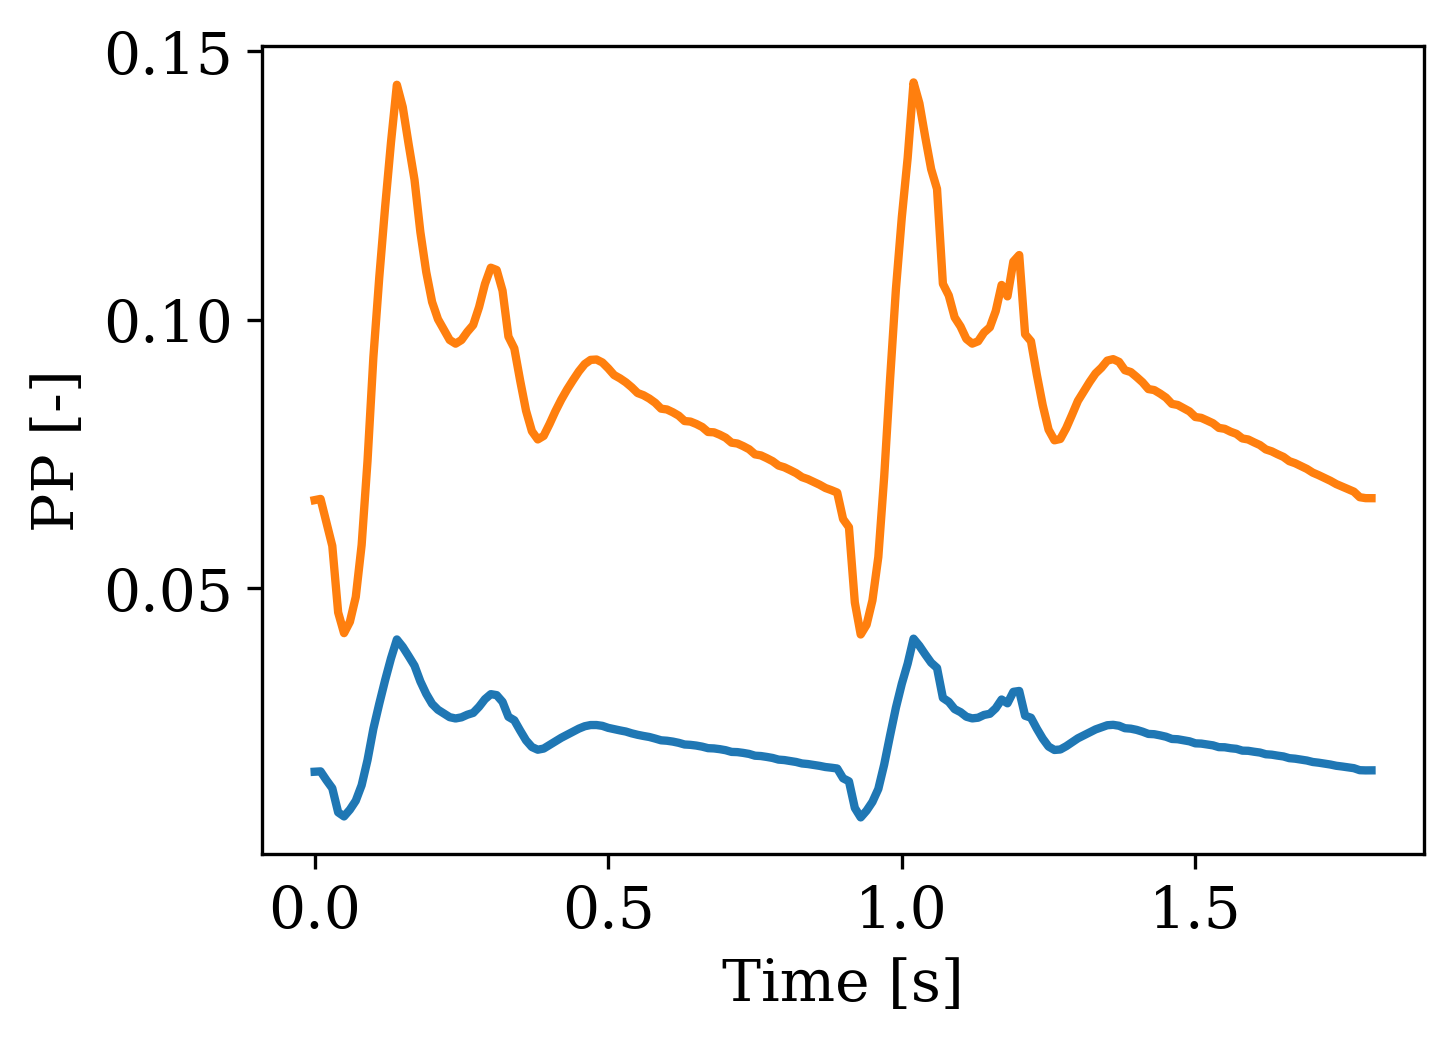

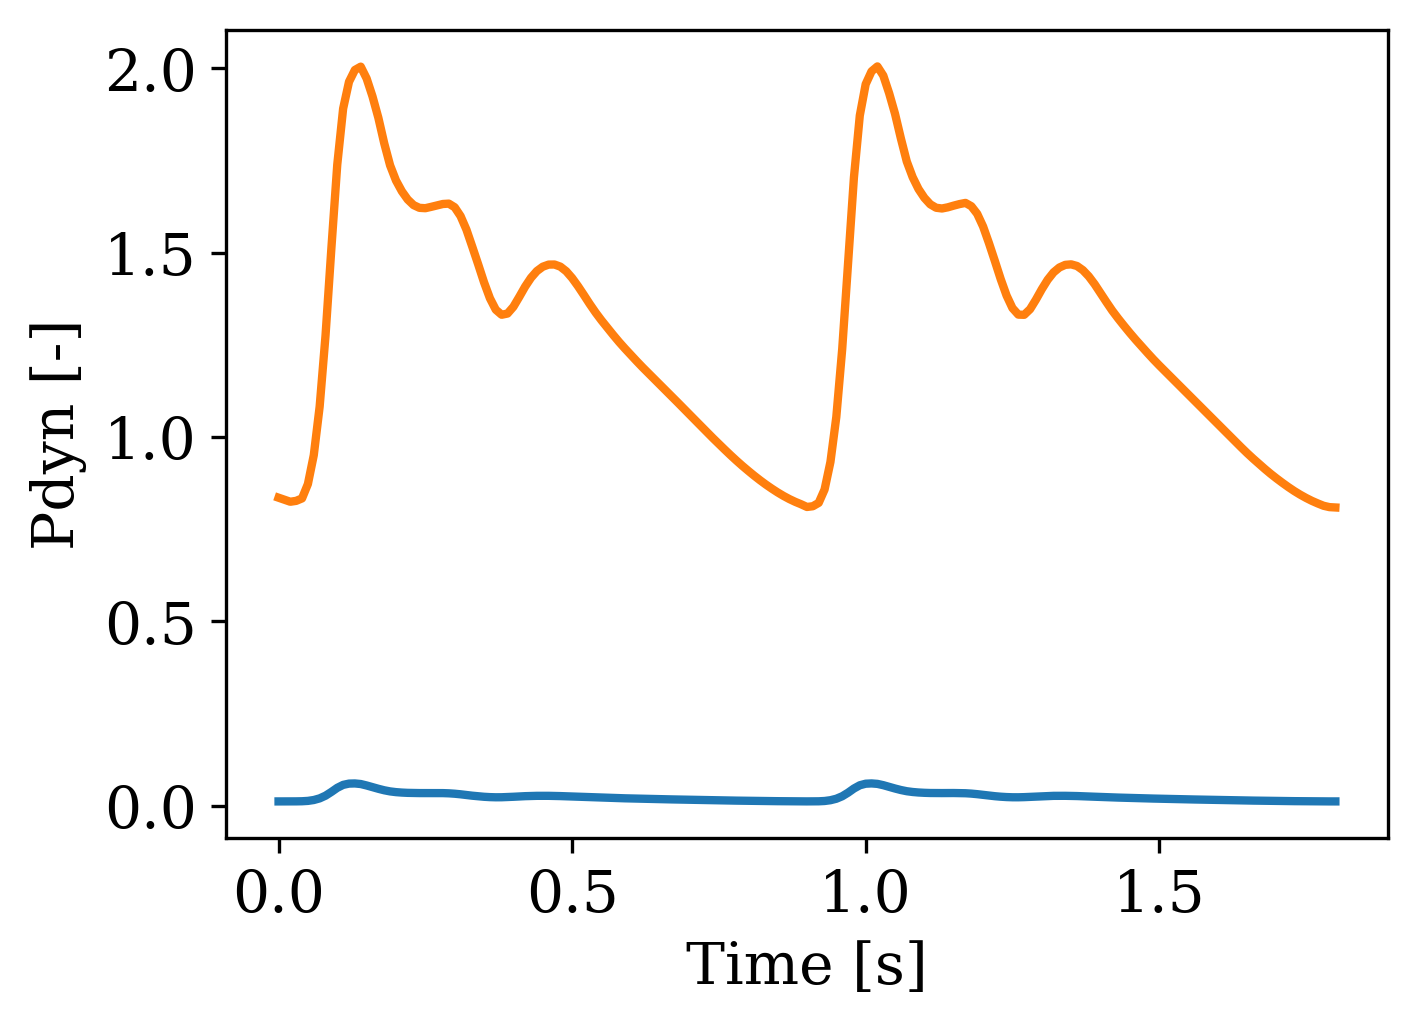

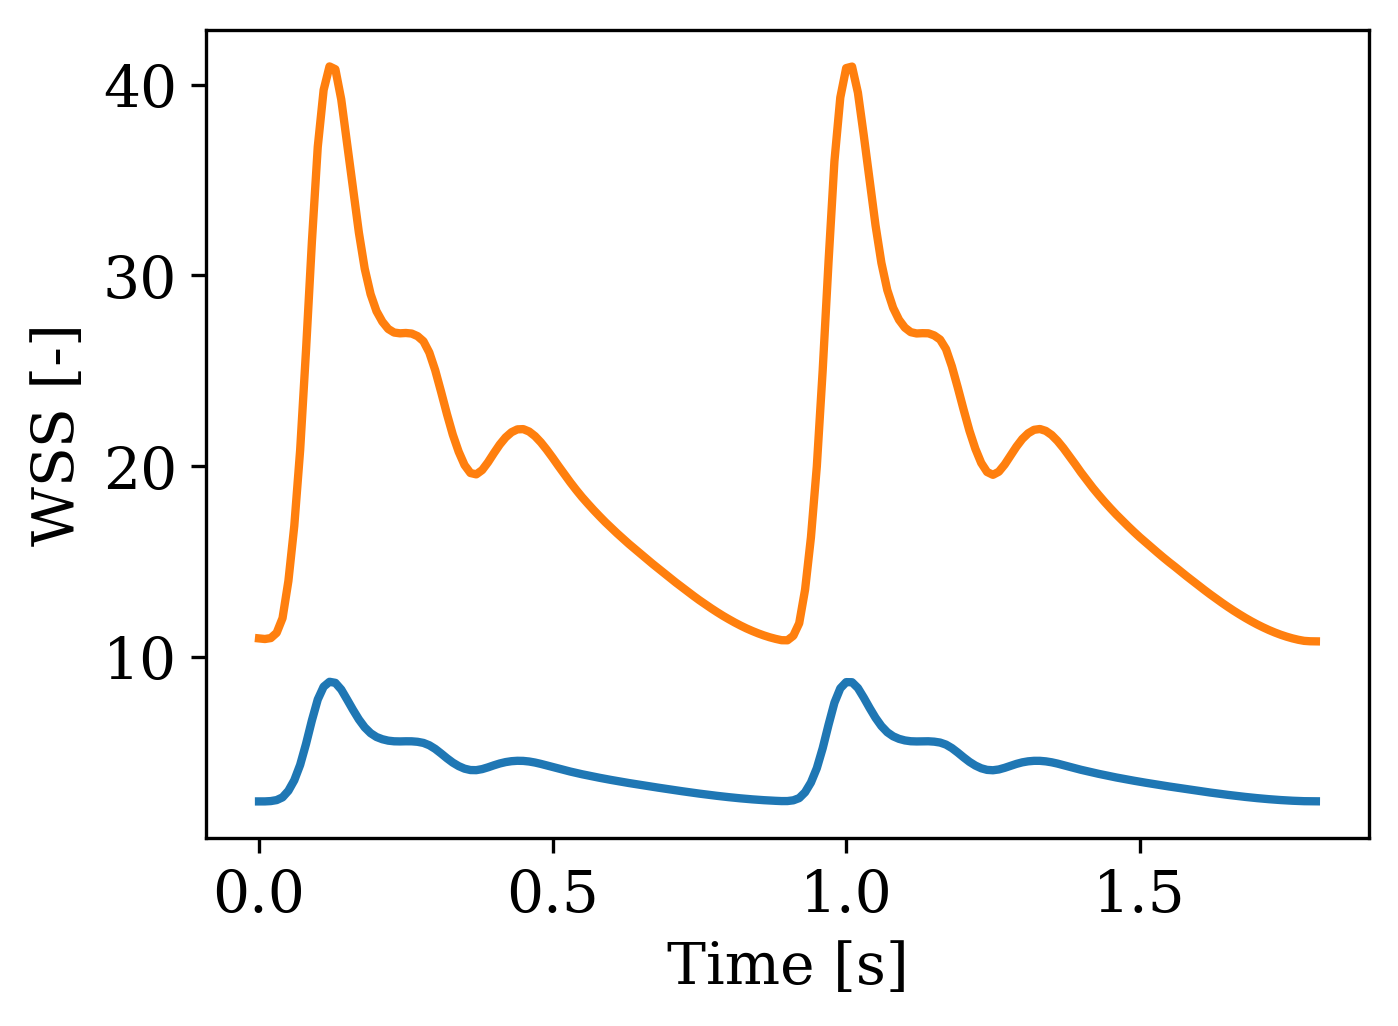

In [ ]:
import matplotlib.pyplot as plt


x = 0.01*np.arange(181)
area_ar = ['ave','max']
var_ar = ['volvel','PD','P','PP','Pdyn','WSS']
# title_ar = ['A','B','C','D','E','F']
# fig, axes = plt.subplots(2,3,dpi=300,figsize=(21.5,13))
# axes = axes.ravel()



for var in range(len(var_ar)):
  plt.figure(dpi=300,figsize=(5,3.5))
  plt.rcParams.update({'font.size':14})
  for area in range(len(area_ar)):
    name1 = var_ar[var] + area_ar[area]
    # print(name1)

    plt.plot(x,temp[name1],lw=2)

    # y_std = hemo_transient[name1].std()
    # y_mean = hemo_transient[name1].mean()
    # y_min = hemo_transient[name1].min()
    # y_max = hemo_transient[name1].max()

    # mean_line = axes[var].hlines(y=y_mean, xmin=x[0], xmax=x[-1], colors='black', lw=2, label='Mean')
    # mean_line = axes[var].hlines(y=[y_mean-y_std, y_mean+y_std], xmin=x[0], xmax=x[-1], colors='grey', linestyles='--', lw=2, label='Std Dev')
    # mean_line = axes[var].hlines(y=[y_min,y_max], xmin=x[0], xmax=x[-1], colors='black', linestyles='--', lw=2, label='Std Dev')

  ylabel=var_ar[var]+' [-]'
  plt.ylabel(ylabel)
  plt.xlabel('Time [s]')
  # axes[var].set_clim(0, 1.8)
  #axes[var].set_title(var_ar[var],size=16)
  #axes[var].grid()

  plt.savefig('Fig_'+str(var)+'.png')
  #plt.hold(False)


In [ ]:
# plt.figure(dpi=300,figsize=(7,5))
# plt.rcParams.update({'font.size':14})

# plt.plot(x,hemo_transient['FR'])
# plt.ylabel('FR [-]',size=18)
# plt.xlabel('Time [s]',size=18)

# ax = plt.gca()
# ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
# ax.get_yaxis().get_offset_text().set(va='bottom', ha='left')
# ax.yaxis.get_offset_text().set_fontsize(14)#设置1e6的大小与位置


# count,y_mean,y_std,y_min,q1,median,q2,y_max=hemo_transient['FR'].describe()

# mean_line = plt.hlines(y=y_mean, xmin=x[0], xmax=x[-1], colors='black', linestyles='dotted', label='Mean')
# mean_line = plt.hlines(y=[y_mean-y_std, y_mean+y_std], xmin=x[0], xmax=x[-1], colors='black', linestyles='dotted', label='Std Dev')
# mean_line = plt.hlines(y=[y_min,y_max], xmin=x[0], xmax=x[-1], colors='black', linestyles='dotted', label='Std Dev')

# mean_line = plt.hlines(y=median, xmin=x[0], xmax=x[-1], colors='black', linestyles='dotted', label='Mean')
# mean_line = plt.hlines(y=[q1,q2], xmin=x[0], xmax=x[-1], colors='black', linestyles='dotted',  label='Std Dev')

# plt.savefig('transient_def_FR.png', dpi=300)

In [ ]:
def permutation_test_between_clfs(y_test, pred_proba_1, pred_proba_2, nsamples=1000):
    auc_differences = []
    auc1 = metrics.roc_auc_score(y_test.ravel(), pred_proba_1.ravel())
    auc2 = metrics.roc_auc_score(y_test.ravel(), pred_proba_2.ravel())
    observed_difference = auc1 - auc2
    for _ in range(nsamples):
        mask = np.random.randint(2, size=len(pred_proba_1.ravel()))
        p1 = np.where(mask, pred_proba_1.ravel(), pred_proba_2.ravel())
        p2 = np.where(mask, pred_proba_2.ravel(), pred_proba_1.ravel())
        auc1 = metrics.roc_auc_score(y_test.ravel(), p1)
        auc2 = metrics.roc_auc_score(y_test.ravel(), p2)
        auc_differences.append(auc1 - auc2)
    return observed_difference, np.mean(auc_differences >= observed_difference)

In [ ]:
# test=pd_ar.dropna(axis=1)
# test.index = X.index
# test.head()

# f1 = []
# auc1 = []
# f2 = []
# auc2 = []
# p_ar = []

# for var in var_ar:
#   comp_ar=[]
#   for area in area_ar:
#     for time in time_ar:
#       names = var+area+'_'+time
#       comp_ar.append(names)
#   # print(len(comp_ar))
#   for feature in comp_ar:
#     X = [f for f in comp_ar if f != feature]
#     # print(X)
#     for feature2 in X:
#       # print(feature)
#       # print(feature2)
#       diff,p_diff=permutation_test_between_clfs(Y,test[feature],test[feature2])
#       if p_diff<0.05:
#         f1.append(feature)
#         auc1.append(metrics.roc_auc_score(Y.ravel(), test[feature].ravel()))
#         f2.append(feature2)
#         auc2.append(metrics.roc_auc_score(Y.ravel(), test[feature2].ravel()))
#         p_ar.append(p_diff)

# comp_ar=[]
# for time in time_ar:
#   names = 'FR_'+time
#   comp_ar.append(names)
# # print(len(comp_ar))
# for feature in comp_ar:
#   X = [f for f in comp_ar if f != feature]
#   # print(X)
#   for feature2 in X:
#     # print(feature)
#     # print(feature2)
#     diff,p_diff=permutation_test_between_clfs(Y,test[feature],test[feature2])
#     if p_diff<0.05:
#       f1.append(feature)
#       auc1.append(metrics.roc_auc_score(Y.ravel(), test[feature].ravel()))
#       f2.append(feature2)
#       auc2.append(metrics.roc_auc_score(Y.ravel(), test[feature2].ravel()))
#       p_ar.append(p_diff)
# outexcel = pd.DataFrame({'f1':f1,'auc1':auc1,'f2':f2,'auc2':auc2,'p':p_ar})
# outexcel.to_excel('diff_auc.xls')

In [ ]:
 def conf(X1, y_2):
  n_bootstraps = 1000
  rng_seed = 42  # control reproducibility
  bootstrapped_scores2 = []

  rng = np.random.RandomState(rng_seed)
  for i in range(n_bootstraps):
      # bootstrap by sampling with replacement on the prediction indices
      indices2 = rng.randint(0, len(y_2), len(y_2))
      if len(np.unique(X1[indices2])) < 2:
          # We need at least one positive and one negative sample for ROC AUC
          # to be defined: reject the sample
          continue

      score2 = metrics.roc_auc_score(X1[indices2], y_2[indices2])
      bootstrapped_scores2.append(score2)
      #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

  sorted_scores2 = np.array(bootstrapped_scores2)
  sorted_scores2.sort()

  # Computing the lower and upper bound of the 90% confidence interval
  # You can change the bounds percentiles to 0.025 and 0.975 to get
  # a 95% confidence interval instead.
  confidence_lower2 = sorted_scores2[int(0.05 * len(sorted_scores2))]
  confidence_upper2 = sorted_scores2[int(0.95 * len(sorted_scores2))]
  return confidence_lower2,confidence_upper2
  #print("Confidence interval for the score: [{:0.3f} - {:0.3f}]".format(
      #confidence_lower2, confidence_upper2))

In [ ]:
def opt_threshold(fpr_1, tpr_1, threshold1):
  optimal_idx = np.argmax(tpr_1 - fpr_1)
  optimal_threshold1 = threshold1[optimal_idx]
  tp1=tpr_1[optimal_idx]
  fp1=fpr_1[optimal_idx]
  return optimal_threshold1,tp1,(1-fp1)

In [ ]:
# comp_ar=[]
# auc_ar=[]
# cfl_ar=[]
# cfu_ar=[]
# opt_ar=[]
# sen_ar=[]
# spec_ar=[]

# var_ar = ['volvel','PD','P','PP','Pdyn','WSS']

# for var in var_ar:
#   for area in area_ar:
#     for time in time_ar:
#       names = var+area+'_'+time
#       comp_ar.append(names)

# for time in time_ar:
#   names = 'FR_'+time
#   comp_ar.append(names)

# print(len(comp_ar))
# for feature in comp_ar:

#   auc_ar.append(metrics.roc_auc_score(Y.ravel(), test[feature]))

#   confl1,confu1 = conf(Y.ravel(), test[feature])
#   cfl_ar.append(confl1)
#   cfu_ar.append(confu1)

#   fpr_1, tpr_1, threshold1 = metrics.roc_curve(Y.ravel(), test[feature])
#   opt,sensitivity,specifity = opt_threshold(fpr_1, tpr_1, threshold1)
#   opt_ar.append(opt)
#   sen_ar.append(sensitivity)
#   spec_ar.append(specifity)

# auc_list = pd.DataFrame({'features':comp_ar,'aucs':auc_ar,
#              'cfl':cfl_ar,'cfu':cfu_ar,
#              'opt':opt_ar,'sensitivity':sen_ar,'specifity':spec_ar})
# auc_list=auc_list.sort_values(by='aucs',ascending=False)
# # print(auc_list)
# auc_list.to_excel('univariate_aucs.xls')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LassoCV

test=pd_ar.dropna(axis=1)
test.index = X.index

# X_aa = pd.get_dummies(X.iloc[:,1:18])
X_aa = X.iloc[:,5:18]
X_all = pd.concat([X_aa,test],axis=1)

train_X, test_X, train_y, test_y = train_test_split(X_all,Y, test_size = 0.3, random_state = 99, stratify=Y)
print(Counter(train_y))
print(Counter(test_y))

# transfer = StandardScaler()
# X_all_ss = transfer.fit_transform(X_all)

# alphas = np.logspace(-1,1,50)
# model_lassoCV = LassoCV(alphas=alphas,cv=10,max_iter=10000).fit(pd.DataFrame(X_all),pd.Series(Y))
# print(model_lassoCV.alphas)
# coef = pd.Series(model_lassoCV.coef_,index=X_all.columns)
# print("Lasso picked " + str(sum(coef!=0)) + " variables and eliminated the other " + str(sum(coef==0)))

# sig_ar_lasso = coef[coef!=0].index
# print(sig_ar_lasso)

Counter({0: 40, 1: 6})
Counter({0: 17, 1: 3})


In [ ]:
transfer = StandardScaler()
test_X_ss = transfer.fit_transform(test_X)
train_X_ss = transfer.fit_transform(train_X)

smo = SMOTE()
X_smo,y_smo = smo.fit_resample(train_X_ss,train_y)
print(Counter(y_smo))

X_smo = pd.DataFrame(X_smo,columns=X_all.columns)
test_X_ss = pd.DataFrame(test_X_ss,columns=X_all.columns)

Counter({0: 40, 1: 40})


In [ ]:
auc_ar = 0

for feature in X_smo:
  auc = metrics.roc_auc_score(y_smo.ravel(), X_smo[feature])

  if auc > auc_ar:
    print(feature)
    print(auc)
    auc_ar = auc
    confl1,confu1 = conf(y_smo.ravel(), X_smo[feature])
    fpr_1, tpr_1, threshold1 = metrics.roc_curve(y_smo.ravel(), X_smo[feature])
    opt,sensitivity,specifity = opt_threshold(fpr_1, tpr_1, threshold1)
    opt_feature=feature

print(opt_feature,auc_ar,confl1,confu1,opt,sensitivity,specifity)

Max size
0.7736226531240382
Max size 0.7736226531240382 0.6981481481481482 0.8461181565109805 -0.15038204945449005 0.8245614035087719 0.6491228070175439


In [ ]:
from scipy.stats import norm
def logit_p1value(model, x):

    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p1[i,1] * p1[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 =  coefs/se
    p1 = (1 - norm.cdf(abs(t1))) * 2
    return p1

In [ ]:
from scipy import stats

def get_conf_int(alpha, lr, X, y):

    """
    Returns (1-alpha) 2-sided confidence intervals
    for sklearn.LinearRegression coefficients
    as a pandas DataFrame
    """

    coefs = np.r_[[lr.intercept_], lr.coef_]
    X_aux = pd.DataFrame(X.copy())
    X_aux.insert(0, 'const', 1)
    dof = -np.diff(X_aux.shape)[0]
    mse = np.sum((y - lr.predict(X)) ** 2) / dof
    var_params = np.diag(np.linalg.inv(X_aux.T.dot(X_aux)))
    t_val = stats.t.isf(alpha/2, dof)
    gap = t_val * np.sqrt(mse * var_params)
    conf_int_lower = coefs.squeeze() - gap
    conf_int_upper = coefs.squeeze() + gap
    return np.exp(conf_int_lower), np.exp(conf_int_upper)



In [ ]:
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
sig_ar_log = []
odd_ar = pd.DataFrame(columns=['Odds Ratio', 'feature','pvalue', '5%', '95%'])
clf = LogisticRegressionCV(cv=10,random_state=0,max_iter=200)
alpha = 0.05

for colName in X_smo.columns:

  lin_model=clf.fit(np.array(X_smo[colName]).reshape(-1,1),y_smo)
  odd = np.exp(clf.coef_)
  conf = pd.DataFrame(odd,columns=['Odds Ratio'])
  conf['feature'] = colName

  pvalue=logit_p1value(lin_model, np.array(X_smo[colName]).reshape(-1,1))
  # print(pvalue[1])
  conf['pvalue'] = pvalue[1]


  ci_l,ci_u = get_conf_int(alpha, lin_model, pd.DataFrame(X_smo[colName]), y_smo)
  conf['5%'] = ci_l[1]
  conf['95%'] = ci_u[1]
  # print(ci_l[1])
  # print(ci_u[1])
  conf.columns = ['Odds Ratio', 'feature','pvalue', '5%', '95%']
  odd_ar=pd.concat([odd_ar,conf],axis=0)

  if pvalue[1]<0.05:
    sig_ar_log.append(colName)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  w

In [ ]:
Counter(y_smo)

Counter({0: 57, 1: 57})

In [ ]:
!pip install xlwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
odd_ar.to_excel('train_univar_log_regression.xls')

<ipython-input-57-176c80cad4b0>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  odd_ar.to_excel('train_univar_log_regression.xls')


In [ ]:
len(sig_ar_log)

30

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
X_vif_ttest = X_smo[sig_ar_log]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_ttest.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif_ttest.values, i)
                          for i in range(len(X_vif_ttest.columns))]

for i in range(len(X_vif_ttest)):
  dropcol=vif_data['VIF'].idxmax()

  X_vif_ttest=X_vif_ttest.drop(columns=[vif_data.iloc[dropcol,0]])

  vif_data = pd.DataFrame()
  vif_data["feature"] = X_vif_ttest.columns

  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X_vif_ttest.values, i)
                            for i in range(len(X_vif_ttest.columns))]

  if sum(vif_data["VIF"]>10)==0:
    break


print(vif_data)

         feature       VIF
0     Neck width  2.310721
1           Pcom  1.886115
2  volvelave_max  1.452738
3  volvelmax_std  2.101612
4       PDave_q1  1.338598
5      PDmax_std  1.794532
6     Pdynave_q2  4.353352
7     Pdynmax_q2  2.554232
8     WSSmax_std  2.892542


In [ ]:
# uni_var_ar = pd.DataFrame(columns=['Odds Ratio', 'feature','pvalue', '5%', '95%'])
# for colName in X_vif_ttest.columns:
#   var = vif_data[vif_data['feature']==colName]

#   odd = odd_ar[odd_ar['feature']==var['feature'].squeeze()]

#   uni_var_ar = pd.concat([uni_var_ar,odd],axis=0)

# uni_var_ar.to_excel('train_after_VIF.xls')
# vif_data.to_excel('train_after_VIF_VIF.xls')

In [ ]:
def logit_p1value(model, x):

    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p1[i,1] * p1[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 =  coefs/se
    p1 = (1 - norm.cdf(abs(t1))) * 2
    return p1

In [ ]:
def get_conf_int(alpha, lr, X, y):

    """
    Returns (1-alpha) 2-sided confidence intervals
    for sklearn.LinearRegression coefficients
    as a pandas DataFrame
    """

    coefs = np.r_[[lr.intercept_], lr.coef_]
    X_aux = pd.DataFrame(X.copy())
    X_aux.insert(0, 'const', 1)
    dof = -np.diff(X_aux.shape)[0]
    mse = np.sum((y - lr.predict(X)) ** 2) / dof
    var_params = np.diag(np.linalg.inv(X_aux.T.dot(X_aux)))
    t_val = stats.t.isf(alpha/2, dof)
    gap = t_val * np.sqrt(mse * var_params)
    conf_int_lower = coefs.squeeze() - gap
    conf_int_upper = coefs.squeeze() + gap
    return np.exp(conf_int_lower), np.exp(conf_int_upper)

In [ ]:
# lin_model.named_steps['rfecv'].estimator_.coef_
# lin_model.named_steps['rfecv'].estimator_.intercept_

In [ ]:
import statsmodels.api as sm

mod = sm.Logit(y_smo, X_smo[X_selected])
res = mod.fit()
#print(res.summary())
params = np.exp(res.params)
conf = np.exp(res.conf_int())
conf['Odds Ratio'] = params
conf['pvalue'] = res.pvalues
conf.columns = ['5%', '95%', 'Odds Ratio', 'pvalue']

X_multi_reg = X_vif_ttest

for colName in X_vif_ttest.columns:
  pidx=conf['pvalue'].idxmax()
  print(pidx)
  X_multi_reg = X_multi_reg.drop(columns=pidx)

  mod = sm.Logit(y_smo, X_smo[X_multi_reg.columns])
  res = mod.fit()
  #print(res.summary())
  params = np.exp(res.params)
  conf = np.exp(res.conf_int())
  conf['Odds Ratio'] = params
  conf['pvalue'] = res.pvalues
  conf.columns = ['5%', '95%', 'Odds Ratio', 'pvalue']

  if sum(conf['pvalue']>0.05)==0:
    break
res.summary()

Optimization terminated successfully.
         Current function value: 0.426223
         Iterations 8
PDmax_std
Optimization terminated successfully.
         Current function value: 0.426306
         Iterations 8
WSSmax_std
Optimization terminated successfully.
         Current function value: 0.426929
         Iterations 8
Pcom
Optimization terminated successfully.
         Current function value: 0.428771
         Iterations 7
Pdynave_q2
Optimization terminated successfully.
         Current function value: 0.434753
         Iterations 7
Pdynmax_q2
Optimization terminated successfully.
         Current function value: 0.445204
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Recurrence   No. Observations:                  114
Model:                          Logit   Df Residuals:                      110
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                  0.3577
Time:                        06:48:31   Log-Likelihood:                -50.753
converged:                       True   LL-Null:                       -79.019
Covariance Type:            nonrobust   LLR p-value:                 3.236e-12
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Neck width        1.0817      0.269      4.026      0.000       0.555       1.608
volvelave_max    -1.1964      0.319     -3.746      0.000      -1.822      -0.570
volvelmax_std     1.0542      0.480      2.198      0.028       0.114       1.994
PDave_q1          0.5516      0.272      2.027      0.043       0.018       1.085
=================================================================================
"""

In [ ]:
conf.to_excel('multi_reg_odd.xls')

<ipython-input-65-23296b9fc09c>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  conf.to_excel('multi_reg_odd.xls')


In [ ]:
from scipy.stats import chi2
def Hosmer_Lemeshow_test(y, y_hat, Q=10):
    '''
    data: dataframe format, with ground_truth label name is y,
                                 prediction value column name is y_hat
    '''
    # data = data.sort_values('y_hat')
    # print(y_hat)
    Q_group = pd.qcut(y_hat.squeeze(), Q)

    y_p = y.groupby(Q_group).sum()
    y_total = y.groupby(Q_group).count()
    y_n = y_total - y_p

    y_hat_p = y_hat.groupby(Q_group).sum()
    y_hat_total = y_hat.groupby(Q_group).count()
    y_hat_n = y_hat_total - y_hat_p

    hltest = (((y_p - y_hat_p)**2 / y_hat_p) + ((y_n - y_hat_n)**2 / y_hat_n)).sum()
    pval = 1 - chi2.cdf(hltest, Q-2)
    print(pval.mean())
    print('\n HL-chi2({}): {}, p-value: {}\n'.format(Q-2, hltest, pval))

y_hat = res.predict(X_multi_reg)
y_hat = pd.DataFrame(y_hat)
y_hat.index = y_smo.index
Hosmer_Lemeshow_test(y_smo, y_hat)

1.0

 HL-chi2(8): 0                   0.0
(0.00532, 0.174]    0.0
(0.174, 0.294]      0.0
(0.294, 0.412]      0.0
(0.412, 0.541]      0.0
(0.541, 0.716]      0.0
(0.716, 0.814]      0.0
(0.814, 0.879]      0.0
(0.879, 0.902]      0.0
(0.902, 0.958]      0.0
(0.958, 1.0]        0.0
dtype: float64, p-value: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



<ipython-input-66-388fc27fe814>:19: RuntimeWarning: '<' not supported between instances of 'pandas._libs.interval.Interval' and 'int', sort order is undefined for incomparable objects.
  hltest = (((y_p - y_hat_p)**2 / y_hat_p) + ((y_n - y_hat_n)**2 / y_hat_n)).sum()
<ipython-input-66-388fc27fe814>:19: RuntimeWarning: '<' not supported between instances of 'pandas._libs.interval.Interval' and 'int', sort order is undefined for incomparable objects.
  hltest = (((y_p - y_hat_p)**2 / y_hat_p) + ((y_n - y_hat_n)**2 / y_hat_n)).sum()


In [ ]:
import statsmodels.api as sm

# X_selected = [['Area Pcom','volvelave_q1']]
X_selected = X_smo[['volvelave_q1','PDave_std','PDave_min']]
mod = sm.Logit(y_smo, X_selected)
res = mod.fit()
#print(res.summary())
params = np.exp(res.params)
conf = np.exp(res.conf_int())
conf['Odds Ratio'] = params
conf['pvalue'] = res.pvalues
conf.columns = ['5%', '95%', 'Odds Ratio', 'pvalue']

res.summary()

Optimization terminated successfully.
         Current function value: 0.423538
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Recurrence   No. Observations:                   80
Model:                          Logit   Df Residuals:                       77
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                  0.3890
Time:                        07:16:29   Log-Likelihood:                -33.883
converged:                       True   LL-Null:                       -55.452
Covariance Type:            nonrobust   LLR p-value:                 4.293e-10
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
volvelave_q1    -0.9885      0.388     -2.547      0.011      -1.749      -0.228
PDave_std        1.0475      0.367      2.852      0.004       0.328       1.767
PDave_min        0.6616      0.355      1.866      0.062      -0.034       1.357
================================================================================
"""

0.9365097968234424


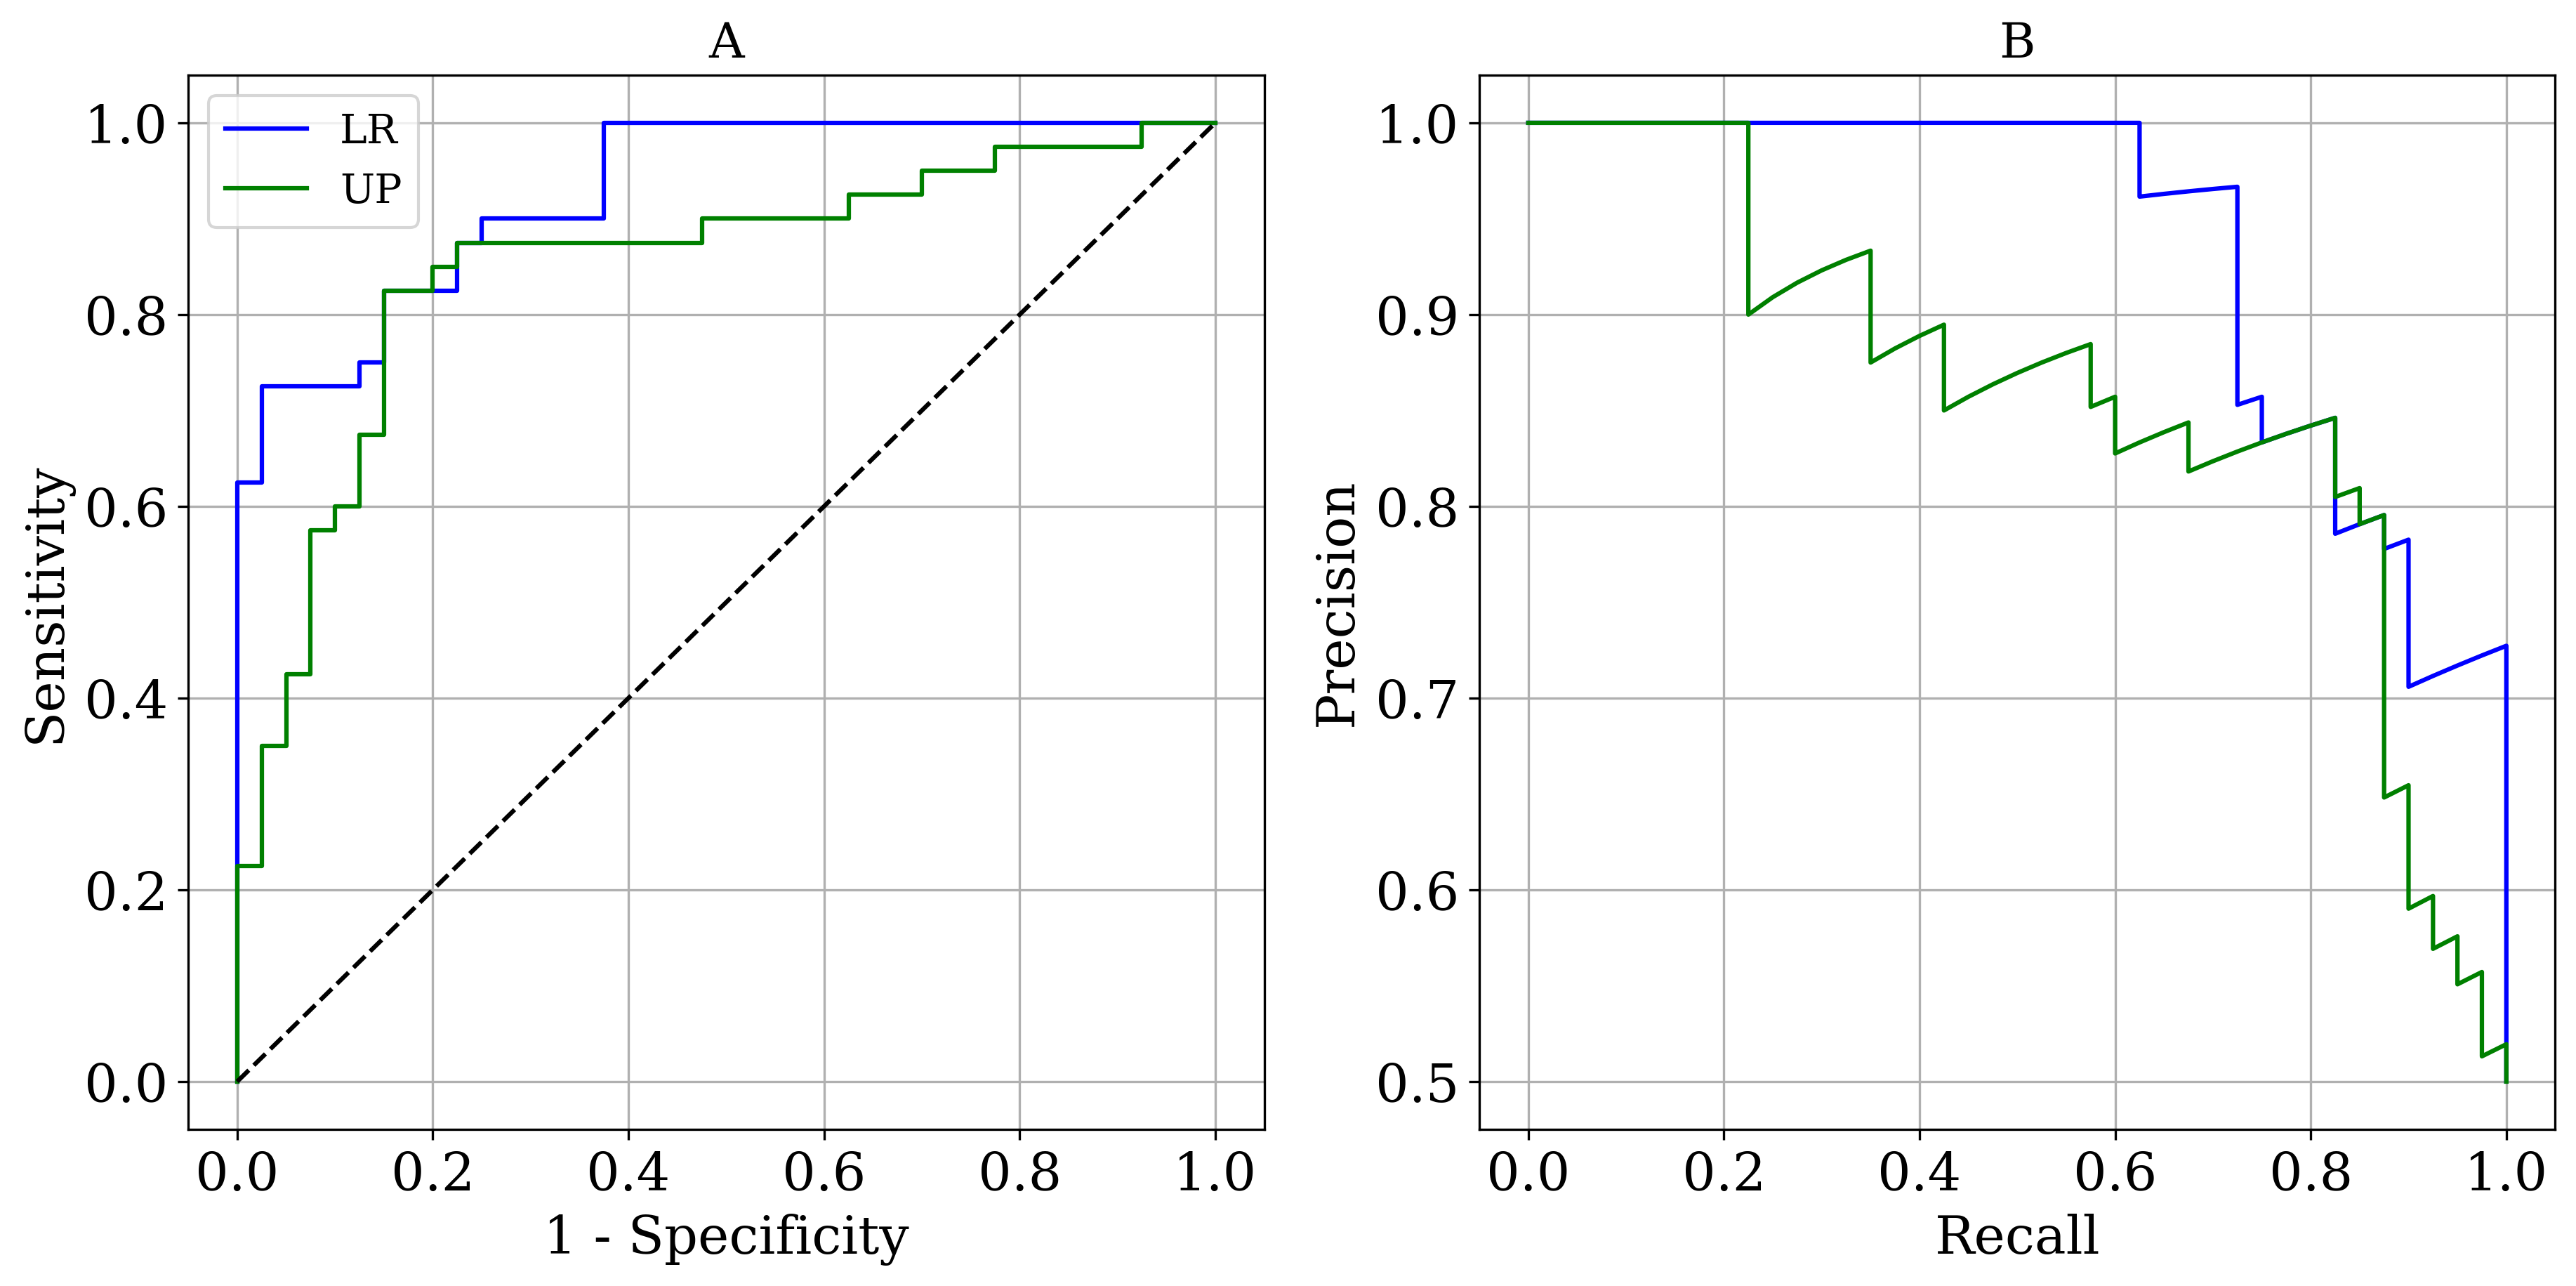

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

# training dataset

plt.figure(dpi=300,figsize=(14.5,6.5))
plt.rcParams.update({'font.size':14})

plt.subplot(121)
plt.title('A')

fpr_6, tpr_6, threshold6 = metrics.roc_curve(pd.Series(y_smo), res.predict(X_selected))
plt.plot(fpr_6,tpr_6,label='LR',color='blue')

fpr_6, tpr_6, threshold6 = metrics.roc_curve(pd.Series(y_smo), X_smo['PDave_q1'])
plt.plot(fpr_6,tpr_6,label='UP',color='green')

plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--')
plt.ylabel('Sensitivity',size=18)
plt.xlabel('1 - Specificity',size=18)
plt.yticks(size=18)
plt.xticks(size=18)
plt.rcParams.update({'font.size':14})
plt.legend()
plt.grid()

plt.subplot(122)
plt.title('B')


lr_precision, lr_recall, _ = precision_recall_curve(pd.Series(y_smo), res.predict(X_selected))
plt.plot(lr_recall, lr_precision, color = 'blue')
print(auc(lr_recall, lr_precision))

lr_precision, lr_recall, _ = precision_recall_curve(pd.Series(y_smo), X_smo['PDave_q1'])
plt.plot(lr_recall, lr_precision,color='green')

# plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--')
plt.xlabel('Recall',size=18)
plt.ylabel('Precision',size=18)
plt.yticks(size=18)
plt.xticks(size=18)
plt.rcParams.update({'font.size':14})
# plt.legend()
plt.grid()

plt.savefig('Fig4.png')

# with PdfPages('Fig4.pdf') as pdf:
# 	plt.plot()
# 	pdf.savefig()

# 	plt.close()

In [ ]:
 def conf(X1, y_2):
  n_bootstraps = 1000
  rng_seed = 42  # control reproducibility
  bootstrapped_scores2 = []

  rng = np.random.RandomState(rng_seed)
  for i in range(n_bootstraps):
      # bootstrap by sampling with replacement on the prediction indices
      indices2 = rng.randint(0, len(y_2), len(y_2))
      if len(np.unique(X1[indices2])) < 2:
          # We need at least one positive and one negative sample for ROC AUC
          # to be defined: reject the sample
          continue

      score2 = metrics.roc_auc_score(X1[indices2], y_2[indices2])
      bootstrapped_scores2.append(score2)
      #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

  sorted_scores2 = np.array(bootstrapped_scores2)
  sorted_scores2.sort()

  # Computing the lower and upper bound of the 90% confidence interval
  # You can change the bounds percentiles to 0.025 and 0.975 to get
  # a 95% confidence interval instead.
  confidence_lower2 = sorted_scores2[int(0.05 * len(sorted_scores2))]
  confidence_upper2 = sorted_scores2[int(0.95 * len(sorted_scores2))]
  return confidence_lower2,confidence_upper2
  #print("Confidence interval for the score: [{:0.3f} - {:0.3f}]".format(
      #confidence_lower2, confidence_upper2))

In [ ]:
auc1 = metrics.roc_auc_score(y_smo.ravel(), (res.predict(X_selected)))
print(auc1)

auc1 = metrics.roc_auc_score(y_smo.ravel(), X_smo['PDave_q1'])
print(auc1)

0.9281250000000001
0.849375


In [ ]:
confl1,confu1 = conf(y_smo, res.predict(X_selected))
fpr_6, tpr_6, threshold6 = metrics.roc_curve(pd.Series(y_smo), res.predict(X_selected))
opt,sensitivity,specifity = opt_threshold(fpr_6, tpr_6, threshold6)
print(confl1,confu1)
print(opt,sensitivity,specifity)

0.8782552083333334 0.967479674796748
0.8540227518831316 0.725 0.975


In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(pd.Series(y_smo), res.predict(X_selected))
print(auc(lr_recall, lr_precision))

pr_conf(pd.Series(y_smo), res.predict(X_selected))



0.9365097968234424
Confidence interval for the score: [0.887 - 0.971]


In [ ]:
confl1,confu1 = conf(y_smo, X_smo['PDave_q1'])
fpr_6, tpr_6, threshold6 = metrics.roc_curve(pd.Series(y_smo), X_smo['PDave_q1'])
opt,sensitivity,specifity = opt_threshold(fpr_6, tpr_6, threshold6)
print(confl1,confu1)
print(opt,sensitivity,specifity)

0.7726984126984128 0.9194373401534527
0.6671956283440634 0.825 0.85


In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(y_smo, X_smo['PDave_q1'])
print(auc(lr_recall, lr_precision))
# test['PDave_q1'].index=np.linspace(0, len(Y)-1, len(Y))
# Y.index=np.linspace(0, len(Y)-1, len(Y))
pr_conf(y_smo, X_smo['PDave_q1'])

0.8577607145659463
Confidence interval for the score: [0.765 - 0.934]


In [ ]:
test_index = np.linspace(0,test_y.shape[0]-1,test_y.shape[0])

In [ ]:
test_index

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [ ]:
test_index = np.linspace(0,test_y.shape[0]-1,test_y.shape[0])
test_X_ss.index = test_index
test_y.index= test_index

In [ ]:
auc1 = metrics.roc_auc_score(test_y.ravel(), (res.predict(test_X_ss[X_selected.columns])))
print('auc')
print(auc1)

confl1,confu1 = conf(test_y.ravel(), (res.predict(test_X_ss[X_selected.columns])))
fpr_6, tpr_6, threshold6 = metrics.roc_curve(test_y.ravel(), (res.predict(test_X_ss[X_selected.columns])))
opt,sensitivity,specifity = opt_threshold(fpr_6, tpr_6, threshold6)
print('auc conf')
print(confl1,confu1)
print('opt sen spec')
print(opt,sensitivity,specifity)

lr_precision, lr_recall, _ = precision_recall_curve(pd.Series(test_y), res.predict(test_X_ss[X_selected.columns]))
print('auprc')
print(auc(lr_recall, lr_precision))
print('auprc conf')
pr_conf(pd.Series(test_y), res.predict(test_X_ss[X_selected.columns]))

auc
0.5294117647058824
auc conf
0.16666666666666663 1.0
opt sen spec
0.8973276948393633 0.3333333333333333 1.0
auprc
0.42633547008547007
auprc conf
Confidence interval for the score: [0.038 - 1.000]


In [ ]:
auc1 = metrics.roc_auc_score(test_y.ravel(), test_X_ss['PDave_q1'])
print('auc')
print(auc1)

confl1,confu1 = conf(test_y.ravel(), test_X_ss['PDave_q1'])
fpr_6, tpr_6, threshold6 = metrics.roc_curve(test_y.ravel(), test_X_ss['PDave_q1'])
opt,sensitivity,specifity = opt_threshold(fpr_6, tpr_6, threshold6)
print('auc conf')
print(confl1,confu1)
print('opt sen spec')
print(opt,sensitivity,specifity)

lr_precision, lr_recall, _ = precision_recall_curve(pd.Series(test_y), test_X_ss['PDave_q1'])
print('auprc')
print(auc(lr_recall, lr_precision))
print('auprc conf')
pr_conf(pd.Series(test_y), test_X_ss['PDave_q1'])

auc
0.7450980392156862
auc conf
0.5625 0.90625
opt sen spec
0.352908291769383 1.0 0.7058823529411764
auprc
0.23234126984126985
auprc conf
Confidence interval for the score: [0.083 - 0.464]


0.42633547008547007


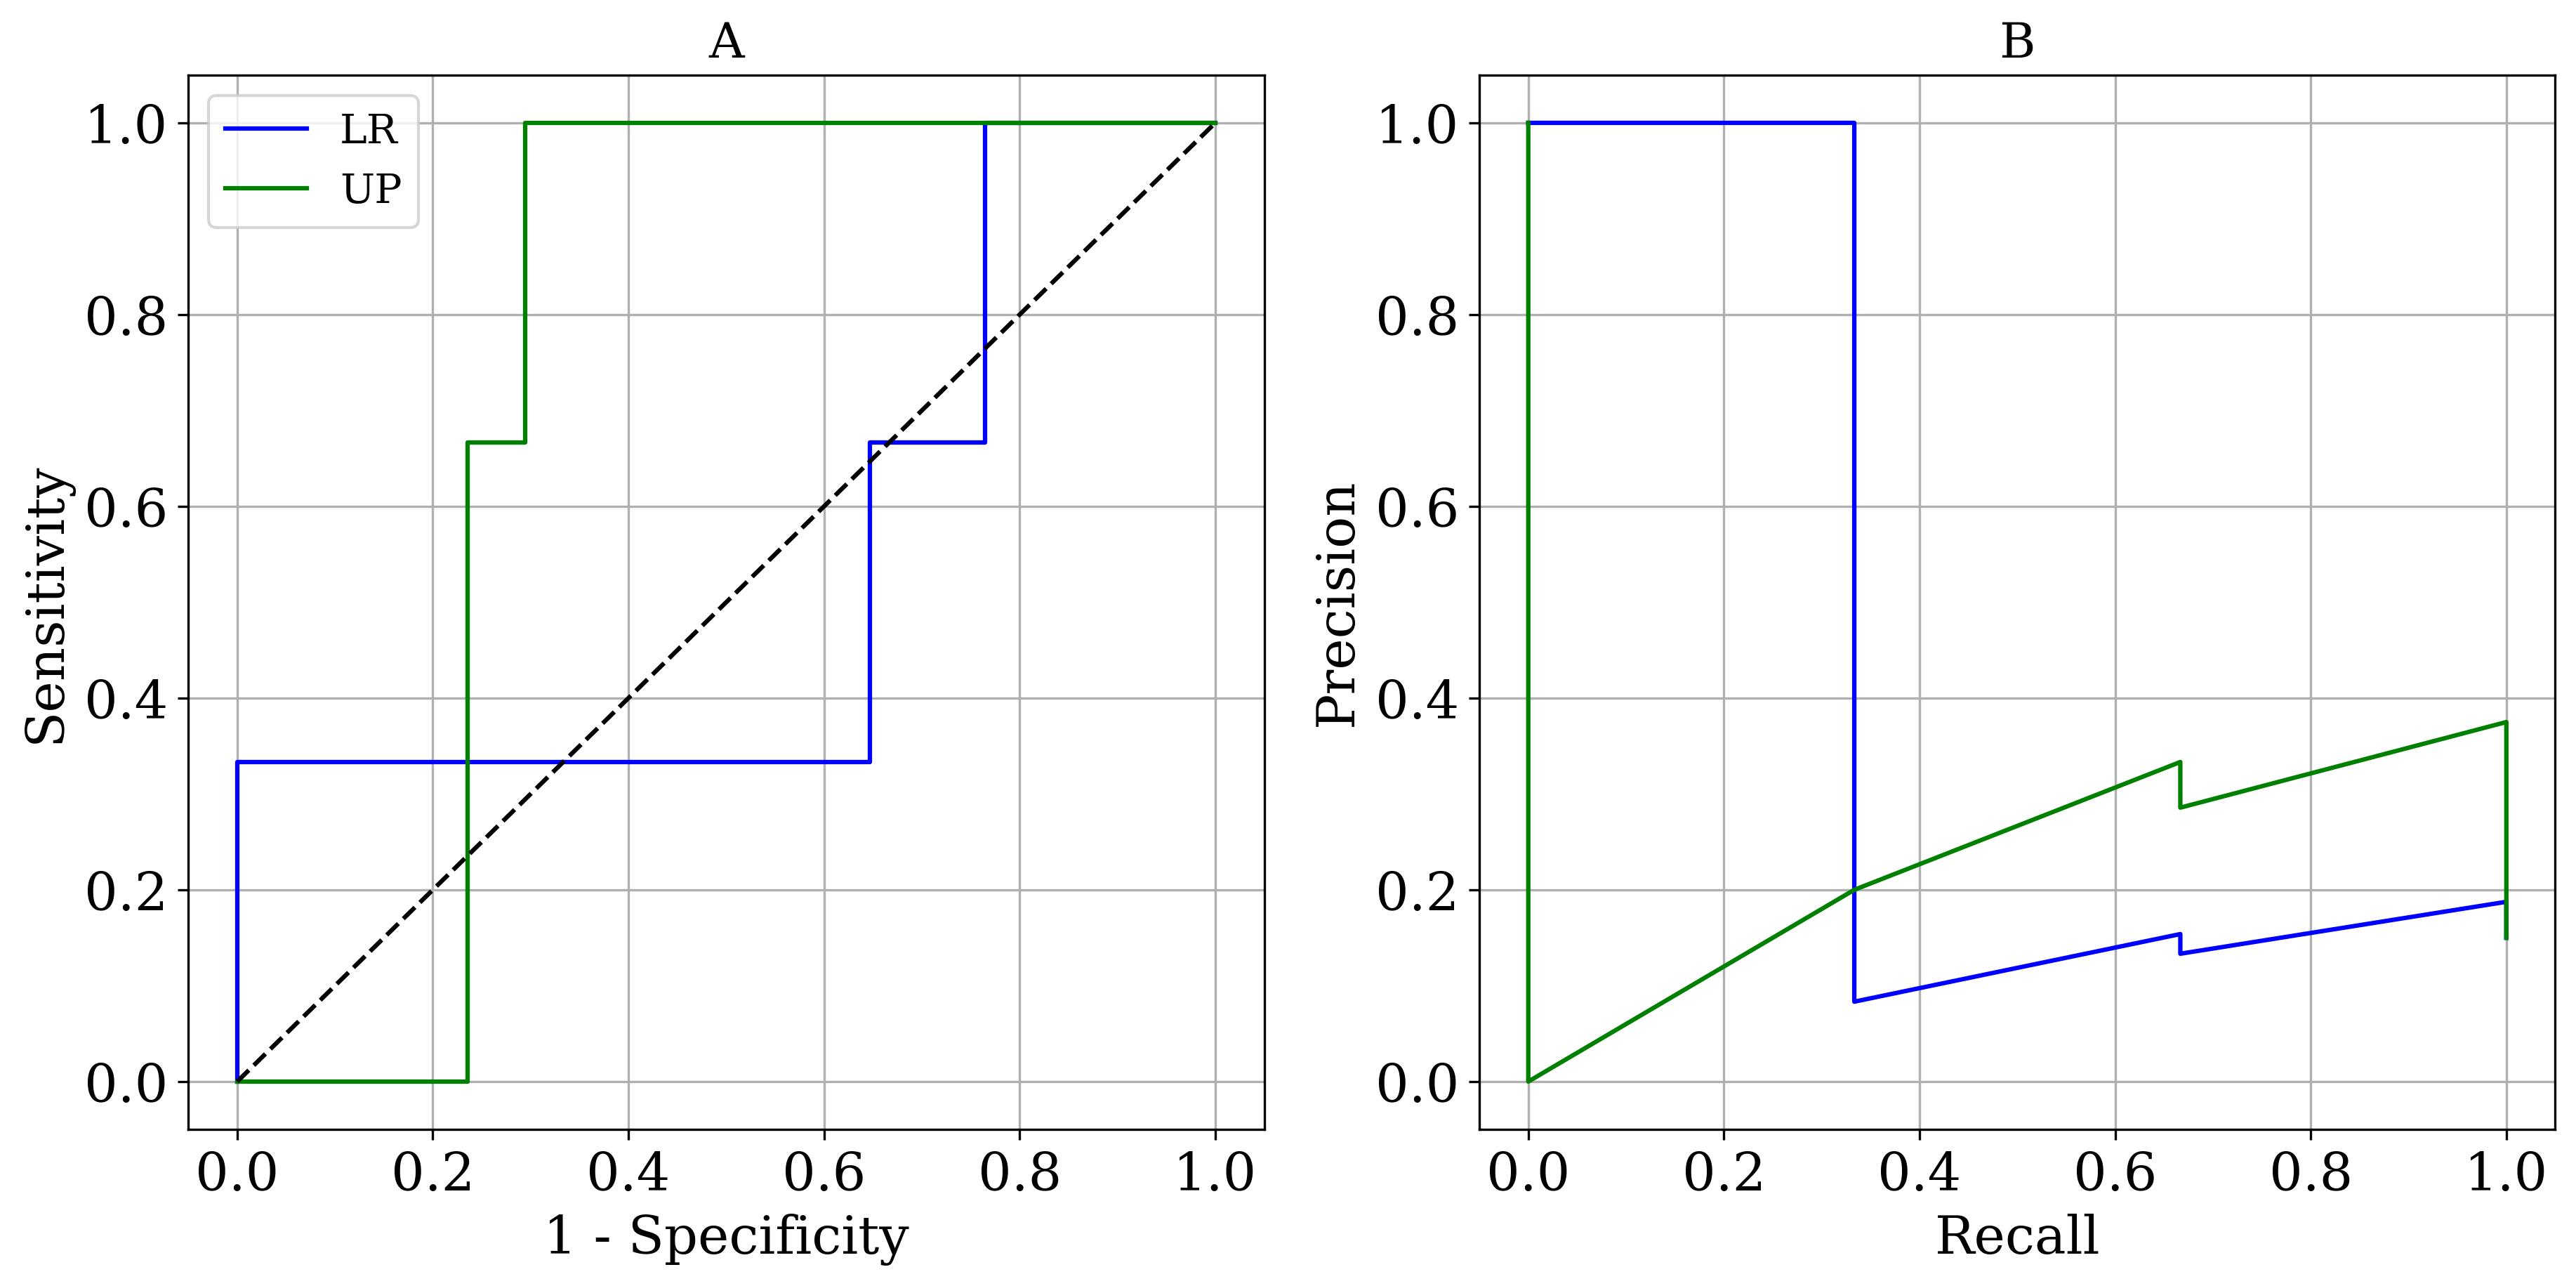

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

# training dataset

plt.figure(dpi=300,figsize=(14.5,6.5))
plt.rcParams.update({'font.size':14})

plt.subplot(121)
plt.title('A')

fpr_6, tpr_6, threshold6 = metrics.roc_curve(pd.Series(test_y), res.predict(test_X_ss[X_selected.columns]))
plt.plot(fpr_6,tpr_6,label='LR',color='blue')

fpr_6, tpr_6, threshold6 = metrics.roc_curve(pd.Series(test_y), test_X_ss['PDave_q1'])
plt.plot(fpr_6,tpr_6,label='UP',color='green')

plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--')
plt.ylabel('Sensitivity',size=18)
plt.xlabel('1 - Specificity',size=18)
plt.yticks(size=18)
plt.xticks(size=18)
plt.rcParams.update({'font.size':14})
plt.legend()
plt.grid()

plt.subplot(122)
plt.title('B')


lr_precision, lr_recall, _ = precision_recall_curve(pd.Series(test_y), res.predict(test_X_ss[X_selected.columns]))
plt.plot(lr_recall, lr_precision, color = 'blue')
print(auc(lr_recall, lr_precision))

lr_precision, lr_recall, _ = precision_recall_curve(pd.Series(test_y), test_X_ss['PDave_q1'])
plt.plot(lr_recall, lr_precision,color='green')

# plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--')
plt.xlabel('Recall',size=18)
plt.ylabel('Precision',size=18)
plt.yticks(size=18)
plt.xticks(size=18)
plt.rcParams.update({'font.size':14})
# plt.legend()
plt.grid()

plt.savefig('Fig5.png')

# with PdfPages('Fig4.pdf') as pdf:
# 	plt.plot()
# 	pdf.savefig()

# 	plt.close()

In [ ]:
y_pred_LR = res.predict(X_selected)
y_LR = [1 if a_ > 0.751 else 0 for a_ in y_pred_LR]


In [ ]:
y_UP = [1 if a_ > 0.320 else 0 for a_ in X_smo['PDave_max']]


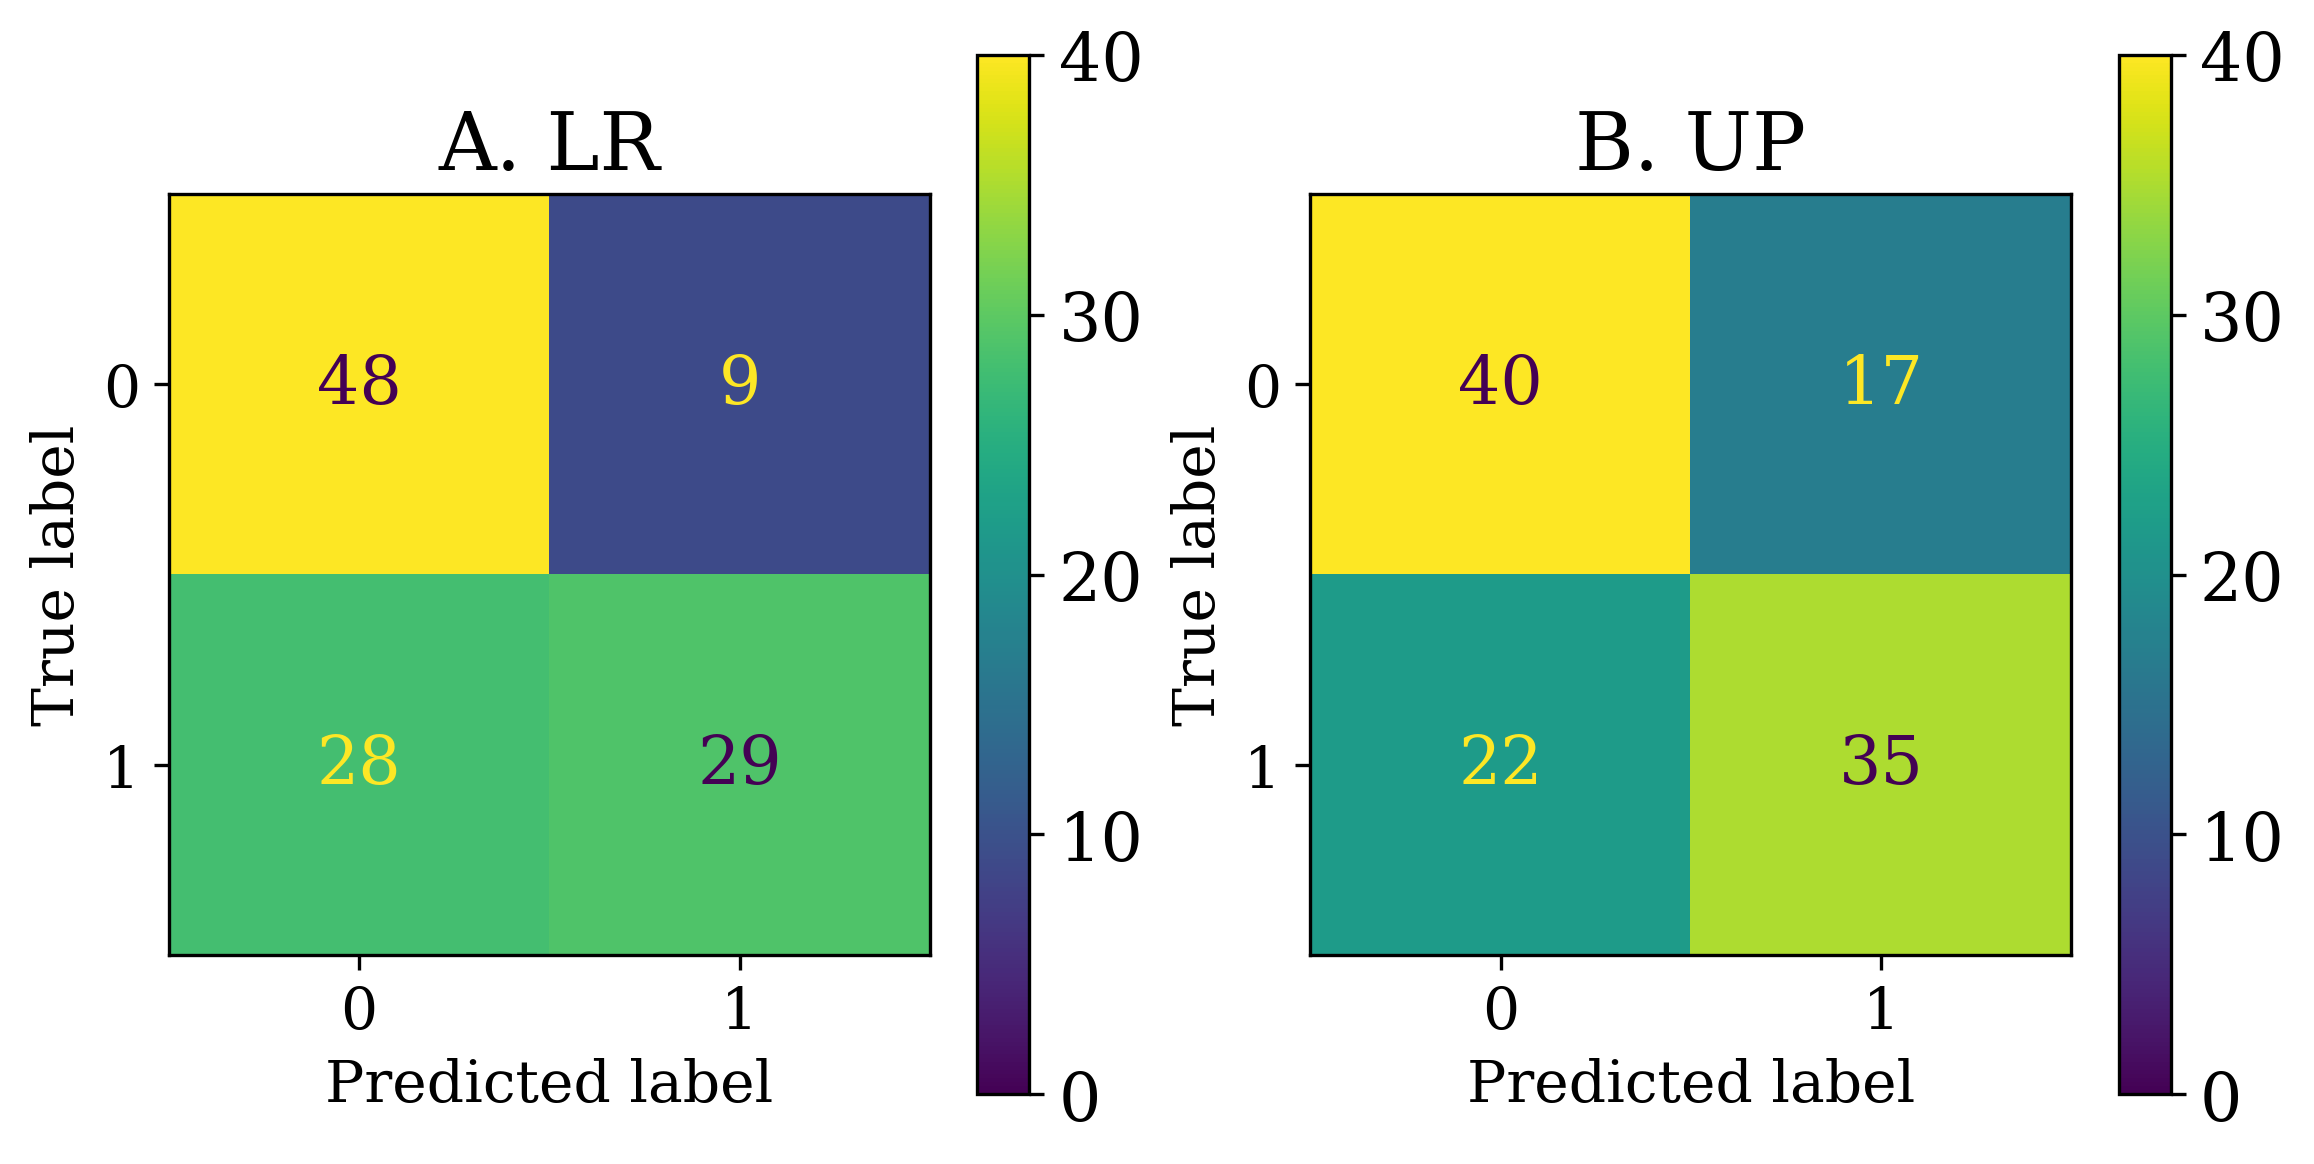

In [ ]:
fig, axes = plt.subplots(1,2,dpi=300,figsize=(9,4.5))
# plt.suptitle('Figure6',x=0.5, y=1)
ax = axes.ravel()

mpl.rc('font', family='serif',size = 16)

cm1 = metrics.confusion_matrix(pd.Series(y_smo), y_LR)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1).plot(ax=ax[0])
#ax[0].set_yticks(size=18)
#plt.xticks(size=18)
ax[0].set_ylabel('True label',size=14)
ax[0].set_xlabel('Predicted label',size=14)
disp1.ax_.get_images()[0].set_clim(0, 40)
ax[0].set_title('A. LR')

cm1 = metrics.confusion_matrix(y_smo, y_UP)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1).plot(ax=ax[1])
ax[1].set_ylabel('True label',size=14)
ax[1].set_xlabel('Predicted label',size=14)
#ax[1].tick_params(axis='both', which='major', labelsize=14)
disp1.ax_.get_images()[0].set_clim(0, 40)
ax[1].set_title('B. UP')

plt.savefig('Confusion_Matrix.png')

In [ ]:
y_pred_LR = res.predict(test_X_ss[['Area Pcom','volvelave_q1']])
y_LR = [1 if a_ > 0.751 else 0 for a_ in y_pred_LR]

y_UP = [1 if a_ > 0.320 else 0 for a_ in test_X_ss['PDave_max']]

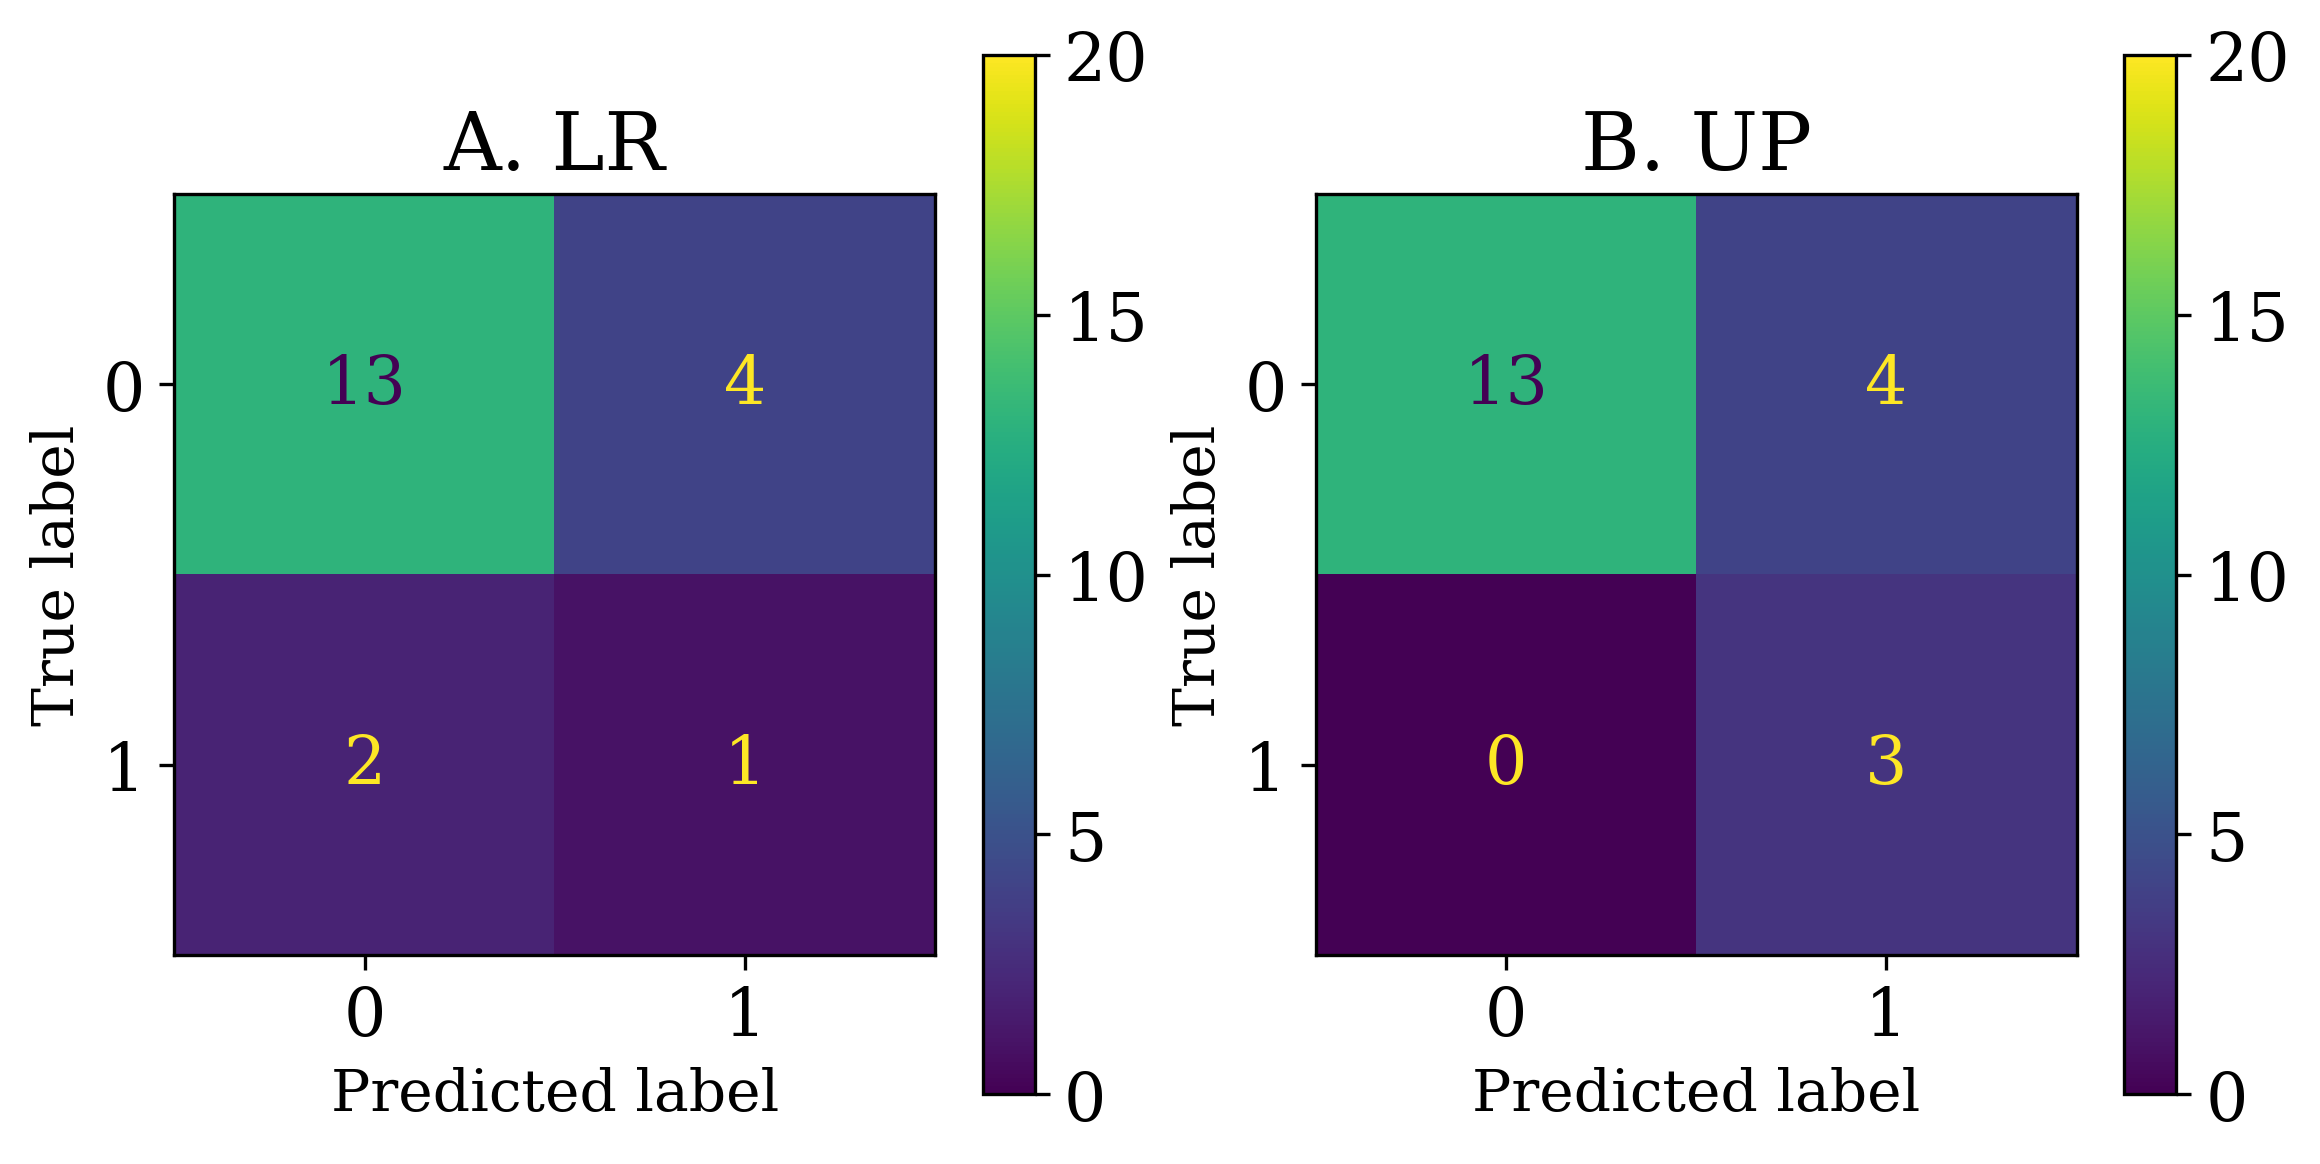

In [ ]:
fig, axes = plt.subplots(1,2,dpi=300,figsize=(9,4.5))
# plt.suptitle('Figure6',x=0.5, y=1)
ax = axes.ravel()

mpl.rc('font', family='serif',size = 16)

cm1 = metrics.confusion_matrix(pd.Series(test_y), y_LR)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1).plot(ax=ax[0])
#ax[0].set_yticks(size=18)
#plt.xticks(size=18)
ax[0].set_ylabel('True label',size=14)
ax[0].set_xlabel('Predicted label',size=14)
disp1.ax_.get_images()[0].set_clim(0, 20)
ax[0].set_title('A. LR')

cm1 = metrics.confusion_matrix(test_y, y_UP)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1).plot(ax=ax[1])
ax[1].set_ylabel('True label',size=14)
ax[1].set_xlabel('Predicted label',size=14)
#ax[1].tick_params(axis='both', which='major', labelsize=14)
disp1.ax_.get_images()[0].set_clim(0, 20)
ax[1].set_title('B. UP')

plt.savefig('Confusion_Matrix.png')

In [ ]:
diff,p_diff=permutation_test_between_clfs(y_smo,res.predict(X_selected),X_smo['PDave_q1'])


In [ ]:
p_diff

0.061

In [ ]:
diff,p_diff=permutation_test_between_clfs(test_y,clf_selected.predict(test_X_ss[X_vif_ttest.columns]),clf_trans.predict(test_X_ss[X_vif_trans.columns]))


NameError: ignored

In [ ]:
from sklearn.model_selection import KFold, RepeatedKFold
def cv_cal(X,y,test_X_ss,test_y,model):
  foldnr=10
  #kf = KFold(n_splits=7, shuffle=True)
  kf = RepeatedKFold(n_splits=foldnr,n_repeats=200)
  # matrix_in = np.matrix('0 0;0 0')
  # accuracy_in = []
  for train_idx, test_idx in kf.split(X):
    X_train, X_test_in = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test_in = y.iloc[train_idx], y.iloc[test_idx]


    model.fit(X_train, y_train)


    # prediction_in = model.predict(X_test_in)
    # accuracy_in.append(metrics.accuracy_score(y_test_in, prediction_in))
    # matrix_in = np.add(matrix_in, confusion_matrix(y_test_in, prediction_in))

  # auc1 = metrics.roc_auc_score(y_train.ravel(), model.predict(X_train))
  # print('auc')
  # print(auc1)

  # confl1,confu1 = conf(y_train.ravel(), model.predict(X_train))
  # fpr_6, tpr_6, threshold6 = metrics.roc_curve(y_train.ravel(), model.predict(X_train))
  # opt,sensitivity,specifity = opt_threshold(fpr_6, tpr_6, threshold6)
  # print('auc conf')
  # print(confl1,confu1)
  # print('opt sen spec')
  # print(opt,sensitivity,specifity)

  # lr_precision, lr_recall, _ = precision_recall_curve(y_train.ravel(), model.predict(X_train))
  # print('auprc')
  # print(auc(lr_recall, lr_precision))
  # print('auprc conf')
  # pr_conf(y_train.ravel(), model.predict(X_train))

  # ------------test--------------

  auc1 = metrics.roc_auc_score(test_y.ravel(), model.predict_proba(test_X_ss)[:,1])
  print('auc')
  print(auc1)

  confl1,confu1 = conf(test_y.ravel(), model.predict_proba(test_X_ss)[:,1])
  fpr_6, tpr_6, threshold6 = metrics.roc_curve(test_y.ravel(), model.predict_proba(test_X_ss)[:,1])
  opt,sensitivity,specifity = opt_threshold(fpr_6, tpr_6, threshold6)
  print('auc conf')
  print(confl1,confu1)
  print('opt sen spec')
  print(opt,sensitivity,specifity)

  lr_precision, lr_recall, _ = precision_recall_curve(test_y.ravel(), model.predict_proba(test_X_ss)[:,1])
  print('auprc')
  print(auc(lr_recall, lr_precision))
  print('auprc conf')
  pr_conf(test_y.ravel(), model.predict_proba(test_X_ss)[:,1])

In [ ]:
from sklearn.model_selection import KFold, RepeatedKFold
def train_performance(X_train,y_train,model):

  auc1 = metrics.roc_auc_score(y_train.ravel(), model.predict_proba(X_train)[:,1])
  print('auc')
  print(auc1)

  confl1,confu1 = conf(y_train.ravel(), model.predict_proba(X_train)[:,1])
  fpr_6, tpr_6, threshold6 = metrics.roc_curve(y_train.ravel(), model.predict_proba(X_train)[:,1])
  opt,sensitivity,specifity = opt_threshold(fpr_6, tpr_6, threshold6)
  print('auc conf')
  print(confl1,confu1)
  print('opt sen spec')
  print(opt,sensitivity,specifity)

  lr_precision, lr_recall, _ = precision_recall_curve(y_train.ravel(), model.predict_proba(X_train)[:,1])
  print('auprc')
  print(auc(lr_recall, lr_precision))
  print('auprc conf')
  pr_conf(y_train.ravel(), model.predict_proba(X_train)[:,1])


In [ ]:
X_sig = ['Max size','Height','Area Neck',
      'volvelave_min','volvelave_max','volvelave_q2','volvelave_a','volvelave_median','volvelave_q1',
      'FR_q1',
      'PDave_max','PDave_std','PDave_q2','PDave_median','PDave_a','PDave_q1']
# X_LR = [X_selected.columns]

In [ ]:
print('all features')
model_KNN_all = KNeighborsClassifier(algorithm='auto')
cv_cal(X_smo,y_smo,test_X_ss,test_y,model_KNN_all)
print('----------------')
print('sig features')
model_KNN_sig = KNeighborsClassifier(algorithm='auto')
cv_cal(X_smo[X_sig],y_smo,test_X_ss[X_sig],test_y,model_KNN_sig)
print('----------------')
print('LR features')
model_KNN_LR = KNeighborsClassifier(algorithm='auto')
cv_cal(X_smo[X_selected.columns],y_smo,test_X_ss[X_selected.columns],test_y,model_KNN_LR)

all features
auc
0.7647058823529411
auc conf
0.42261904761904756 1.0
opt sen spec
0.6 0.6666666666666666 0.7647058823529411
auprc
0.5409867909867909
auprc conf
Confidence interval for the score: [0.071 - 1.000]
----------------
sig features
auc
0.7549019607843136
auc conf
0.33333333333333337 1.0
opt sen spec
0.6 0.6666666666666666 0.8823529411764706
auprc
0.6499999999999999
auprc conf
Confidence interval for the score: [0.050 - 1.000]
----------------
LR features
auc
0.6568627450980392
auc conf
0.2777777777777778 0.9166666666666667
opt sen spec
0.4 0.6666666666666666 0.7058823529411764
auprc
0.48690476190476184
auprc conf
Confidence interval for the score: [0.050 - 0.750]


In [ ]:
print('all features')
train_performance(X_smo,y_smo,model_KNN_all)
print('----------------')
print('sig features')
train_performance(X_smo[X_sig],y_smo,model_KNN_sig)
print('----------------')
print('LR features')
train_performance(X_smo[X_selected.columns],y_smo,model_KNN_LR)

all features
auc
0.9881249999999999
auc conf
0.9709864603481625 1.0
opt sen spec
1.0 0.925 1.0
auprc
0.9901465201465202
auprc conf
Confidence interval for the score: [0.977 - 0.999]
----------------
sig features
auc
0.979375
auc conf
0.9558270676691729 0.9955808080808082
opt sen spec
0.8 0.9 1.0
auprc
0.9828997894215286
auprc conf
Confidence interval for the score: [0.961 - 0.996]
----------------
LR features
auc
0.9659375000000001
auc conf
0.9348370927318296 0.9893483709273183
opt sen spec
0.8 0.875 0.95
auprc
0.9711704608308898
auprc conf
Confidence interval for the score: [0.943 - 0.991]


In [ ]:
from sklearn.svm import SVC
print('all features')
model_lSVC_all = SVC(kernel='linear',probability=True)
cv_cal(X_smo,y_smo,test_X_ss,test_y,model_lSVC_all)

print('sig features')
model_lSVC_sig = SVC(kernel='linear',probability=True)
cv_cal(X_smo[X_sig],y_smo,test_X_ss[X_sig],test_y,model_lSVC_sig)

print('LR features')
model_lSVC_LR = SVC(kernel='linear',probability=True)
cv_cal(X_smo[X_selected.columns],y_smo,test_X_ss[X_selected.columns],test_y,model_lSVC_LR)

all features
auc
0.7058823529411765
auc conf
0.47058823529411764 0.9444444444444445
opt sen spec
0.17962707445625536 1.0 0.5882352941176471
auprc
0.22824074074074074
auprc conf
Confidence interval for the score: [0.062 - 0.823]
sig features
auc
0.7450980392156863
auc conf
0.5263157894736843 0.9230769230769231
opt sen spec
0.05003311469127138 1.0 0.5882352941176471
auprc
0.23703703703703702
auprc conf
Confidence interval for the score: [0.083 - 0.533]
LR features
auc
0.6274509803921569
auc conf
0.27777777777777773 1.0
opt sen spec
0.658930343308843 0.3333333333333333 1.0
auprc
0.4483465608465608
auprc conf
Confidence interval for the score: [0.056 - 1.000]


In [ ]:
print('all features')
train_performance(X_smo,y_smo,model_lSVC_all)
print('----------------')
print('sig features')
train_performance(X_smo[X_sig],y_smo,model_lSVC_sig)
print('----------------')
print('LR features')
train_performance(X_smo[X_selected.columns],y_smo,model_lSVC_LR)

all features
auc
1.0
auc conf
0.9999999999999999 1.0
opt sen spec
0.7072471892943808 1.0 1.0
auprc
1.0
auprc conf
Confidence interval for the score: [1.000 - 1.000]
----------------
sig features
auc
0.9700000000000001
auc conf
0.9308610936517914 0.9993734335839599
opt sen spec
0.5222543832699345 0.95 0.975
auprc
0.9518215607945324
auprc conf
Confidence interval for the score: [0.874 - 1.000]
----------------
LR features
auc
0.92125
auc conf
0.8673790069138907 0.9649781113195748
opt sen spec
0.5349494002526363 0.75 0.95
auprc
0.9344709938854874
auprc conf
Confidence interval for the score: [0.885 - 0.971]


In [ ]:
from sklearn.svm import SVC
print('all features')
model_gSVC_all = SVC(kernel='rbf',probability=True)
cv_cal(X_smo,y_smo,test_X_ss,test_y,model_gSVC_all)

print('sig features')
model_gSVC_sig = SVC(kernel='rbf',probability=True)
cv_cal(X_smo[X_sig],y_smo,test_X_ss[X_sig],test_y,model_gSVC_sig)

print('LR features')
model_gSVC_LR = SVC(kernel='rbf',probability=True)
cv_cal(X_smo[X_selected.columns],y_smo,test_X_ss[X_selected.columns],test_y,model_gSVC_LR)

all features
auc
0.7450980392156863
auc conf
0.38888888888888884 1.0
opt sen spec
0.27506714823068207 0.6666666666666666 0.9411764705882353
auprc
0.3391330891330891
auprc conf
Confidence interval for the score: [0.071 - 1.000]
sig features
auc
0.8235294117647058
auc conf
0.4901960784313726 1.0
opt sen spec
0.46931604671945343 0.6666666666666666 1.0
auprc
0.7386363636363635
auprc conf
Confidence interval for the score: [0.091 - 1.000]
LR features
auc
0.5490196078431372
auc conf
0.05882352941176472 1.0
opt sen spec
0.7071487471760691 0.3333333333333333 1.0
auprc
0.4360380116959064
auprc conf
Confidence interval for the score: [0.050 - 1.000]


In [ ]:
print('all features')
train_performance(X_smo,y_smo,model_gSVC_all)
print('----------------')
print('sig features')
train_performance(X_smo[X_sig],y_smo,model_gSVC_sig)
print('----------------')
print('LR features')
train_performance(X_smo[X_selected.columns],y_smo,model_gSVC_LR)

all features
auc
0.991875
auc conf
0.9793233082706767 1.0
opt sen spec
0.674429109904513 0.925 1.0
auprc
0.9926822262405786
auprc conf
Confidence interval for the score: [0.981 - 1.000]
----------------
sig features
auc
0.988125
auc conf
0.9724828017510944 0.9987468671679198
opt sen spec
0.45108796885574487 0.925 0.975
auprc
0.9893712486040963
auprc conf
Confidence interval for the score: [0.975 - 0.999]
----------------
LR features
auc
0.9612499999999999
auc conf
0.9301587301587302 0.986
opt sen spec
0.4542890321252192 0.875 0.925
auprc
0.9645944796792404
auprc conf
Confidence interval for the score: [0.931 - 0.988]


In [ ]:
print('all features')
model_GBC_all = GradientBoostingClassifier()
cv_cal(X_smo,y_smo,test_X_ss,test_y,model_GBC_all)
print('----------------')
print('sig features')
model_GBC_sig = GradientBoostingClassifier()
cv_cal(X_smo[X_sig],y_smo,test_X_ss[X_sig],test_y,model_GBC_sig)
print('----------------')
print('LR features')
model_GBC_LR = GradientBoostingClassifier()
cv_cal(X_smo[X_selected.columns],y_smo,test_X_ss[X_selected.columns],test_y,model_GBC_LR)

all features
auc
0.8627450980392156
auc conf
0.6842105263157895 1.0
opt sen spec
0.0005498487809757616 1.0 0.7647058823529411
auprc
0.5686507936507936
auprc conf
Confidence interval for the score: [0.125 - 1.000]
----------------
sig features
auc
0.8039215686274509
auc conf
0.6111111111111112 0.9722222222222223
opt sen spec
0.000834080163396493 1.0 0.6470588235294117
auprc
0.28888888888888886
auprc conf
Confidence interval for the score: [0.100 - 0.944]
----------------
LR features
auc
0.4019607843137255
auc conf
0.11111111111111116 0.7647058823529411
opt sen spec
0.0003181021728489113 1.0 0.17647058823529416
auprc
0.11862116641528409
auprc conf
Confidence interval for the score: [0.033 - 0.278]


In [ ]:
print('all features')
train_performance(X_smo,y_smo,model_GBC_all)
print('----------------')
print('sig features')
train_performance(X_smo[X_sig],y_smo,model_GBC_sig)
print('----------------')
print('LR features')
train_performance(X_smo[X_selected.columns],y_smo,model_GBC_LR)

all features
auc
0.999375
auc conf
0.9974937343358397 1.0
opt sen spec
0.9999634347987604 0.975 1.0
auprc
0.9993826219512195
auprc conf
Confidence interval for the score: [0.997 - 1.000]
----------------
sig features
auc
0.9975
auc conf
0.9924242424242424 1.0
opt sen spec
0.006423317235396816 0.95 1.0
auprc
0.9976020370133744
auprc conf
Confidence interval for the score: [0.992 - 1.000]
----------------
LR features
auc
0.9978125
auc conf
0.9929078014184397 1.0
opt sen spec
0.9322624016811412 1.0 0.975
auprc
0.9977712015733519
auprc conf
Confidence interval for the score: [0.992 - 1.000]


In [ ]:
print('all features')
model_MLP_all = MLPClassifier()
cv_cal(X_smo,y_smo,test_X_ss,test_y,model_MLP_all)
print('----------------')
print('sig features')
model_MLP_sig = MLPClassifier()
cv_cal(X_smo[X_sig],y_smo,test_X_ss[X_sig],test_y,model_MLP_sig)
print('----------------')
print('LR features')
model_MLP_LR = MLPClassifier()
cv_cal(X_smo[X_selected.columns],y_smo,test_X_ss[X_selected.columns],test_y,model_MLP_LR)



all features


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

auc
0.6666666666666666
auc conf
0.27450980392156865 0.953125
opt sen spec
0.22115058058418413 0.6666666666666666 0.8235294117647058
auprc
0.2451388888888889
auprc conf
Confidence interval for the score: [0.062 - 0.838]
----------------
sig features


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

auc
0.6862745098039216
auc conf
0.25 1.0
opt sen spec
0.47736218584251866 0.6666666666666666 0.8235294117647058
auprc
0.4951388888888889
auprc conf
Confidence interval for the score: [0.059 - 1.000]
----------------
LR features


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

auc
0.5686274509803921
auc conf
0.21568627450980393 1.0
opt sen spec
0.833267244532394 0.3333333333333333 1.0
auprc
0.4337752525252525
auprc conf
Confidence interval for the score: [0.045 - 1.000]


In [ ]:
print('all features')
train_performance(X_smo,y_smo,model_MLP_all)
print('----------------')
print('sig features')
train_performance(X_smo[X_sig],y_smo,model_MLP_sig)
print('----------------')
print('LR features')
train_performance(X_smo[X_selected.columns],y_smo,model_MLP_LR)

all features
auc
1.0
auc conf
0.9999999999999999 1.0
opt sen spec
0.26944273826942783 1.0 1.0
auprc
1.0
auprc conf
Confidence interval for the score: [1.000 - 1.000]
----------------
sig features
auc
1.0
auc conf
0.9999999999999999 1.0
opt sen spec
0.46171831641519506 1.0 1.0
auprc
1.0
auprc conf
Confidence interval for the score: [1.000 - 1.000]
----------------
LR features
auc
0.948125
auc conf
0.9074421513445905 0.9785353535353536
opt sen spec
0.47787725824973226 0.875 0.9
auprc
0.9542356448332698
auprc conf
Confidence interval for the score: [0.915 - 0.982]


In [ ]:
import pickle

with open('/content/drive/MyDrive/ML_transient/model_KNN_all', 'wb') as files:
    pickle.dump(model_KNN_all, files)
with open('/content/drive/MyDrive/ML_transient/model_KNN_sig', 'wb') as files:
    pickle.dump(model_KNN_sig, files)
with open('/content/drive/MyDrive/ML_transient/model_KNN_LR', 'wb') as files:
    pickle.dump(model_KNN_LR, files)

with open('/content/drive/MyDrive/ML_transient/model_lSVC_all', 'wb') as files:
    pickle.dump(model_lSVC_all, files)
with open('/content/drive/MyDrive/ML_transient/model_lSVC_sig', 'wb') as files:
    pickle.dump(model_lSVC_sig, files)
with open('/content/drive/MyDrive/ML_transient/model_lSVC_LR', 'wb') as files:
    pickle.dump(model_lSVC_LR, files)

with open('/content/drive/MyDrive/ML_transient/model_gSVC_all', 'wb') as files:
    pickle.dump(model_gSVC_all, files)
with open('/content/drive/MyDrive/ML_transient/model_gSVC_sig', 'wb') as files:
    pickle.dump(model_gSVC_sig, files)
with open('/content/drive/MyDrive/ML_transient/model_gSVC_LR', 'wb') as files:
    pickle.dump(model_gSVC_LR, files)

with open('/content/drive/MyDrive/ML_transient/model_GBC_all', 'wb') as files:
    pickle.dump(model_GBC_all, files)
with open('/content/drive/MyDrive/ML_transient/model_GBC_sig', 'wb') as files:
    pickle.dump(model_GBC_sig, files)
with open('/content/drive/MyDrive/ML_transient/model_GBC_LR', 'wb') as files:
    pickle.dump(model_GBC_LR, files)

with open('/content/drive/MyDrive/ML_transient/model_MLP_all', 'wb') as files:
    pickle.dump(model_MLP_all, files)
with open('/content/drive/MyDrive/ML_transient/model_MLP_sig', 'wb') as files:
    pickle.dump(model_MLP_sig, files)
with open('/content/drive/MyDrive/ML_transient/model_MLP_LR', 'wb') as files:
    pickle.dump(model_MLP_LR, files)

In [ ]:
with open('/content/drive/MyDrive/ML_transient/model_Log' , 'rb') as f:
    model_Log = pickle.load(f)
with open('/content/drive/MyDrive/ML_transient/model_KNN' , 'rb') as f:
    model_KNN = pickle.load(f)
with open('/content/drive/MyDrive/ML_transient/model_lSVC' , 'rb') as f:
    model_lSVC = pickle.load(f)
with open('/content/drive/MyDrive/ML_transient/model_gSVC' , 'rb') as f:
    model_gSVC = pickle.load(f)
with open('/content/drive/MyDrive/ML_transient/model_GBC' , 'rb') as f:
    model_GBC = pickle.load(f)
with open('/content/drive/MyDrive/ML_transient/model_MLP' , 'rb') as f:
    model_MLP = pickle.load(f)
